# Authors:
# Bùi Anh Phú

# The Data: Diabetes 130-US hospitals for years 1999-2008

The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge. The problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide proper diabetes care not only increases the managing costs for the hospitals (as the patients are readmitted) but also impacts the morbidity and mortality of the patients, who may face complications associated with diabetes.

source: https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008

## Loading Data

Set pandas options:
+ Display max columns: 500
+ inf values are considered na

In [26]:
import pandas as pd
import numpy as np

In [27]:
# display options
pd.set_option('display.max_columns', 100)
pd.options.mode.use_inf_as_na = True
df = pd.read_csv('diabetic_data.csv')
print(df.shape)
df.head()

C:\Users\buiha\AppData\Local\Temp\ipykernel_28596\2048790284.py:3: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True


(101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Data investigation

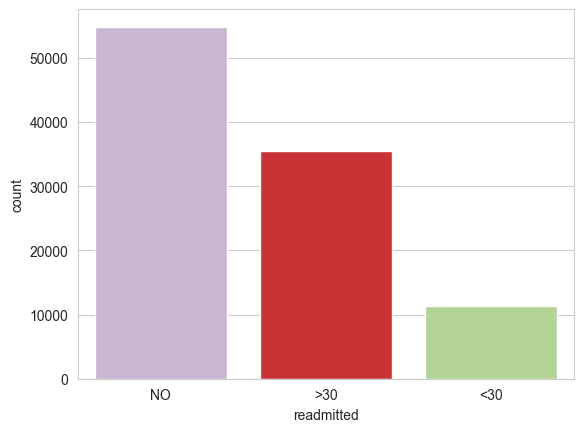

In [28]:
# plot the distribution of the target variable with bar chart
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.countplot(x='readmitted', data=df, palette='Paired_r',hue='readmitted')

plt.show()
# possible values for palette 

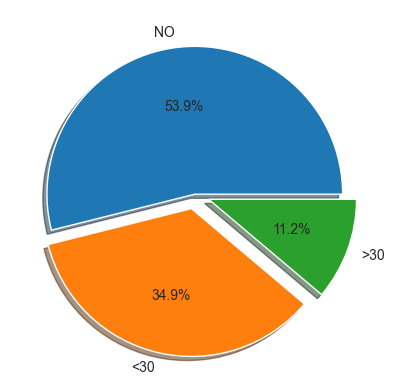

In [29]:
# plot using pie chart
plt.pie(df['readmitted'].value_counts(),labels=['NO','<30','>30'],autopct='%1.1f%%',shadow=True,explode=(0,0.1,0.1))
plt.show()

### We can see the class imbalance occurs here if we try to classify 3 classes, so we decide to just classify between readmitted (<30,>30) or not readmitted (No)

In [30]:
df['readmitted'].replace(['NO','<30','>30'],[0,1,1],inplace=True)
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,NaN,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,NaN,NaN,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0


### + Turn "?",'Unknown/Invalid','None','Not Mapped','Not Available' into np.nan for easier manipulation

In [31]:
# df.replace(['?','Unknown/Invalid','None','Not Mapped','Not Available'],np.nan,inplace=True)
# df.head()

FUNCTION TO SUMMARY DATA

In [32]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing#'] = df.isna().sum() + df.isin(['?']).sum() + df.isin(['Unknown/Invalid','None','Not Mapped','Not Available']).sum()
    summary_df['missing%'] = (df.isna().sum() + df.isin(['?']).sum() + df.isin(['Unknown/Invalid','None','Not Mapped','Not Available']).sum())/len(df)
    summary_df['unique'] = df.nunique().values
    summary_df['count'] = df.count().values
    return summary_df

summary(df)


,dtypes,missing#,missing%,unique,count
encounter_id,int64,0,0.000000,101766,101766
patient_nbr,int64,0,0.000000,71518,101766
race,object,2273,0.022336,6,101766
gender,object,3,0.000029,3,101766
age,object,0,0.000000,10,101766
weight,object,98569,0.968585,10,101766
admission_type_id,int64,0,0.000000,8,101766
discharge_disposition_id,int64,0,0.000000,26,101766
admission_source_id,int64,0,0.000000,17,101766
time_in_hospital,int64,0,0.000000,14,101766


max_glu_serum and A1Cresult have remarkable number of missing values, this is too much, we will delete these features

In [33]:
df.drop('max_glu_serum',axis=1,inplace=True)
df.drop('A1Cresult',axis=1,inplace=True)

### Now, we are going to look in detail what happens with all of our features. This will give us information when it comes to eliminating any features and handling missing values

Function to find percentage of readmission at any class in categorical feautures

In [34]:
def readmission_percentage(feature):
    percentage_list = []
    for i in df[feature].unique():
        percentage_list.append(len(df[ (df[feature] == i) & (df['readmitted'] == 1)]) / len(df[df[feature] == i]))
    return percentage_list

First, we gonna look at
+ encounter_id: Unique identifier of an encounter, every time patient go in hospital they have new encounter id
+ patient_nbr: Unique identifier of a patient, this is unique for any patient

In [35]:
# plot relation between encounter_id and patient_nbr using groupby, only show patient_nbr with more than 1 encounter_id
patient_encount_num = df.groupby(df['patient_nbr']).agg({'encounter_id':'count'}).sort_values(by='encounter_id',ascending=False)

# rename columns and reset index
patient_encount_num.rename(columns={'encounter_id':'encounter_num'},inplace=True)
patient_encount_num.reset_index(inplace=True)
patient_encount_num.head()

patient_visit_one = patient_encount_num[patient_encount_num['encounter_num'] == 1]
patient_visit_multi = patient_encount_num[patient_encount_num['encounter_num'] > 1]

print('Number of patients: ',len(patient_encount_num))
print('Number of patients with only one visit: ',len(patient_visit_one))
print('Number of patients with multiple visits: ',len(patient_visit_multi))

patient_encount_num.head()

Number of patients:  71518
Number of patients with only one visit:  54745
Number of patients with multiple visits:  16773


,patient_nbr,encounter_num
0,88785891,40
1,43140906,28
2,1660293,23
3,23199021,23
4,88227540,23


In [36]:
# def for mapping encounter_num to patient_nbr in df
def map_encount_num(df):
    encounter_num_list = []
    for i in df['patient_nbr']:
        encounter_num_list.append(patient_encount_num[patient_encount_num['patient_nbr'] == i]['encounter_num'].values[0])
    df['encounter_num'] = encounter_num_list
    return encounter_num_list

map_encount_num(df)

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 3,
 1,
 1,
 1,
 3,
 2,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 7,
 1,
 3,
 1,
 10,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 7,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 3,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 16,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 4,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 2,
 1,
 1,
 4,
 3,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 5,
 3,
 1,
 5,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 6,
 1,
 4,
 2,
 6,
 4,
 2,
 1,
 1,
 5,
 1,
 1,
 1,
 1,
 1,
 1

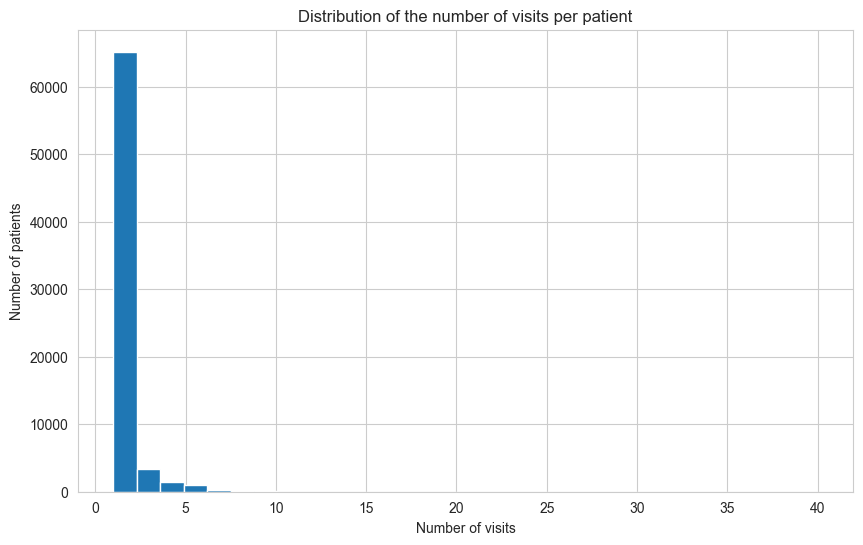

<Axes: xlabel='encounter_num', ylabel='count'>

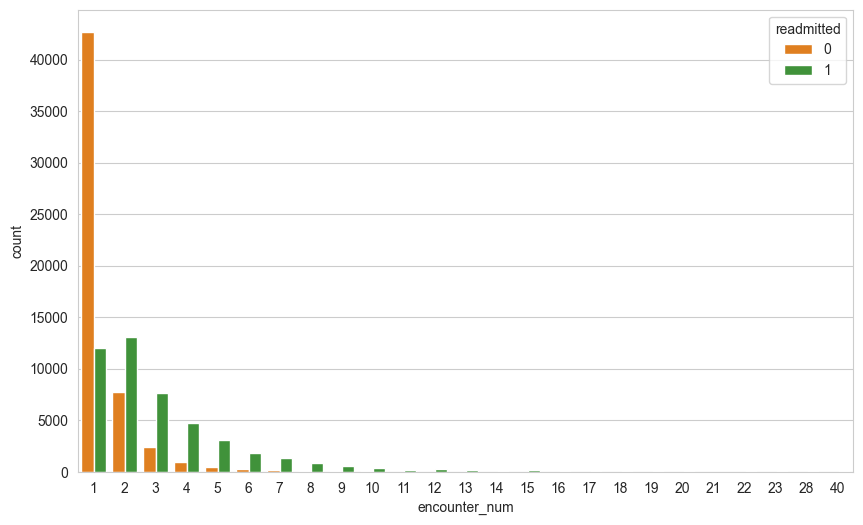

In [37]:
# plot the distribution of the number of visits per patient
# add readmitted column to patient_encount_num

plt.figure(figsize=(10,6))
plt.hist(patient_encount_num['encounter_num'],bins=30)
plt.xlabel('Number of visits')
plt.ylabel('Number of patients')
plt.title('Distribution of the number of visits per patient')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='encounter_num', hue='readmitted', data=df, palette='Paired_r')

# Customize the plot
# plt.title('Readmission by number of visits per patient')
# plt.xlabel('Number of visits')
# plt.ylabel('Count')
# plt.legend(title='number of visit', labels=['Not Readmitted', 'Readmitted'])
# plt.show()


In [38]:
# readmission percentage by number of visits per patient
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,encounter_num
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,1
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1,1
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,1
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,1
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,1


Text(0.5, 1.0, 'Readmission percentage by num_procedures')

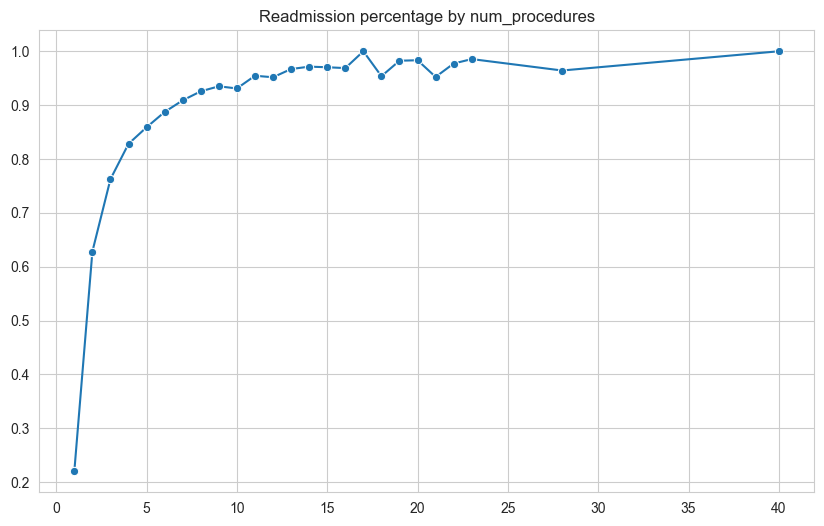

In [39]:
readmission_percentage('encounter_num')

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['encounter_num'].unique(),y=readmission_percentage('encounter_num'),marker='o')
plt.title('Readmission percentage by num_procedures')

+ Out of 71518 patients, we got 54745 patients who only visit 1 times
+ 16773 patients visit more than 1 times
+ The more visits a patient have, the more likely that that patient will be readmitted

### Next, we will consider "race" feature

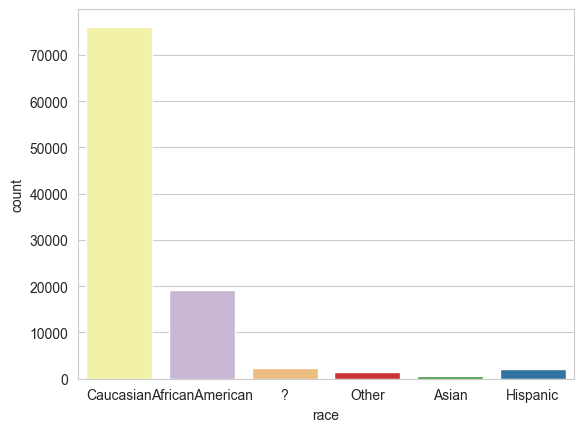

In [40]:
# plot the distribution of race types
sns.countplot(x='race', data=df, palette='Paired_r',hue='race')
plt.show()


+ We can see that Caucasian accounts for most of patients
+ Lots of "?" can be seen too.

But, "?" can be thought as missing values or "Other", because anyone must belongs to 1 race and it hardly that the staff hospital can not specify which race is the patient as those information is pretty clear, so we decide to set "?" as "Other" for "race" feature

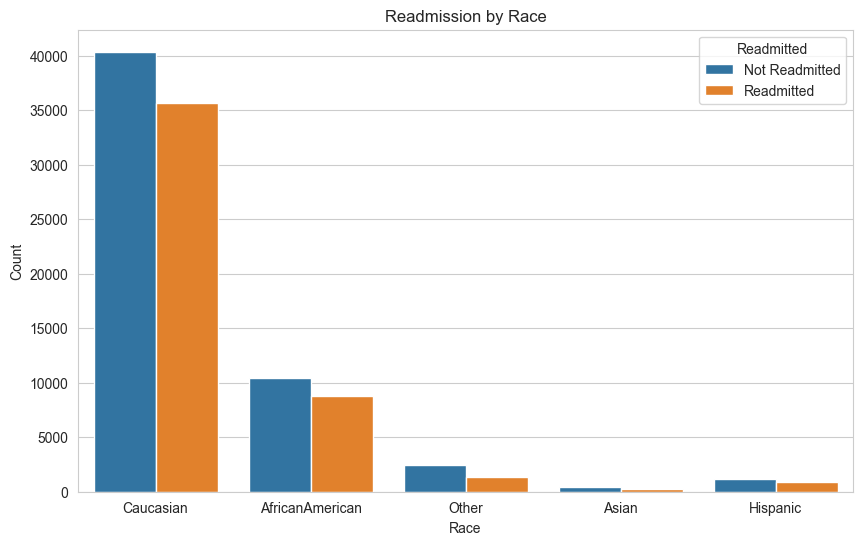

In [41]:
df['race'].replace('?','Other',inplace=True)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='readmitted', data=df)

# Customize the plot
plt.title('Readmission by Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.legend(title='Readmitted', labels=['Not Readmitted', 'Readmitted'])
plt.show()


In [42]:
readmission_percentage('race')

[0.46933599653083485,
 0.4575221238938053,
 0.34850489547499336,
 0.35257410296411856,
 0.41924398625429554]

+ Readmitted rate and not readmitted rate for any race does not have much differences, so it might be that "race" does not have big impact on target variable.
+ Caucasian in The USA accounts for most of the population, that is why there is a bias toward this race, creating category imbalance
==> we will omit this feature

In [43]:
df.drop('race',axis=1,inplace=True)

### Next is for "gender" ,"age","weight"

We will look at gender to see if it has any impact

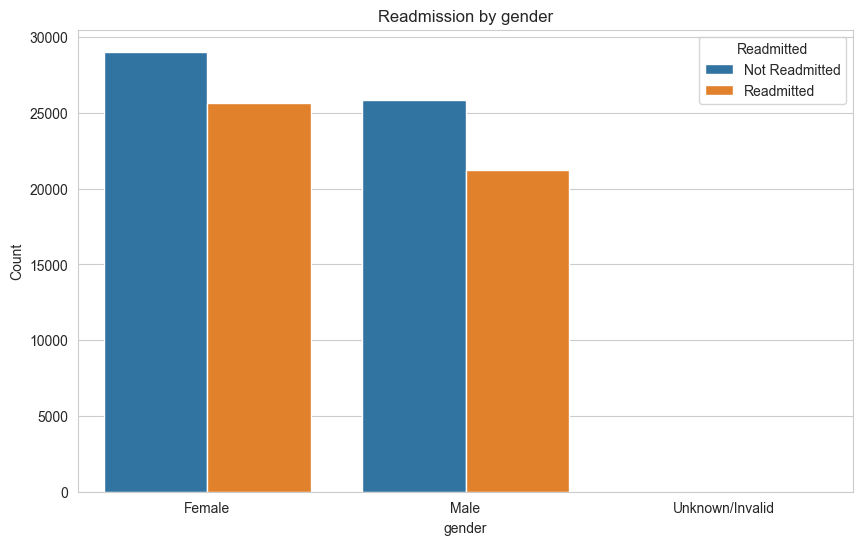

Percentage of female patients readmitted:  46.92 %
Percentage of female patients readmitted:  38.81 %


In [44]:
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='readmitted', data=df)

# Customize the plot
plt.title('Readmission by gender')
plt.xlabel('gender')
plt.ylabel('Count')
plt.legend(title='Readmitted', labels=['Not Readmitted', 'Readmitted'])

plt.show()


# Percentage of female patients readmitted
per = len(df[ (df['gender'] == "Female") & (df['readmitted'] == 1)]) / len(df[df['gender'] == 'Female'])
print('Percentage of female patients readmitted: ',round(per*100,2),'%')


per = len(df[ (df['gender'] == "Male") & (df['readmitted'] == 1)]) / len(df[df['gender'] == 'Female'])
print('Percentage of female patients readmitted: ',round(per*100,2),'%')


+ Readmission rates for both gender are slightly balance, there are more female patient to be readmitted as well as not redmitted, this could be because the population in this data have more female. However, It is 46.92% female out of all female readmitted, this number for male is lower with 38.81%
==> possibly female are more likely to be readmitted


For age, we first want to look at all possible values of this features, because it is described as categorical whereas age is mostly number.

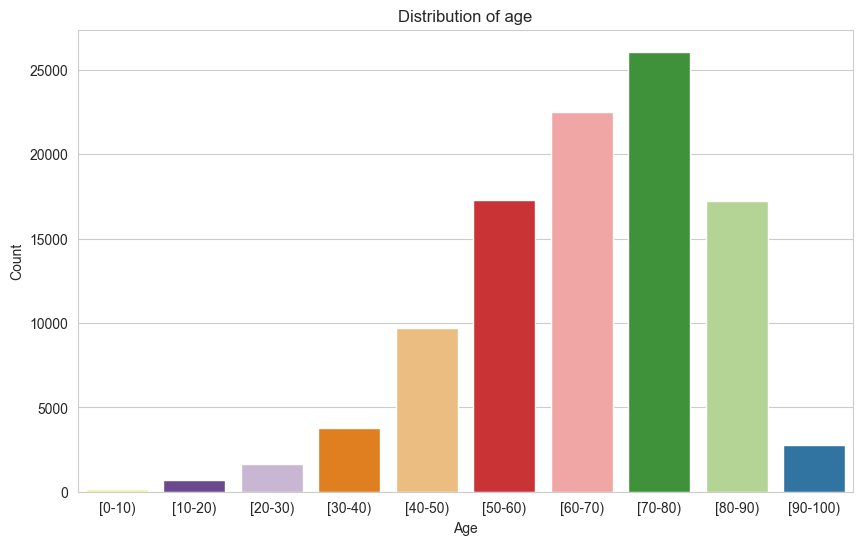

In [45]:
# plot the distribution of age
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='age', data=df, palette='Paired_r')
plt.title('Distribution of age')

# Customize the plot
plt.title('Distribution of age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


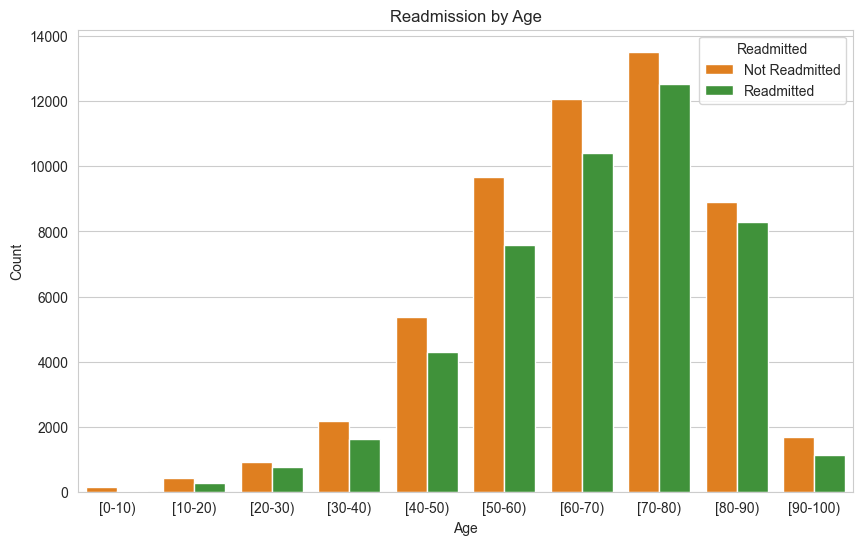

In [46]:
# Countplot for age
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='readmitted', data=df, palette='Paired_r')

# Customize the plot
plt.title('Readmission by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Readmitted', labels=['Not Readmitted', 'Readmitted'])
plt.show()

In [47]:
readmission_percentage('age')

[0.18012422360248448,
 0.38205499276411,
 0.45021122510561257,
 0.4267549668874172,
 0.4445018069179143,
 0.4395572554473806,
 0.4625272428056754,
 0.48120300751879697,
 0.4827004710123859,
 0.4002864303616183]

+ Rate of not readmitted in this dataset are always higher than readmitted rate; The older the patient, the higher the risk that he/she will be readmitted

### Let see the readmission percentage at each age gap

In [48]:
percent_readmitted_age = []
for i in df['age'].unique():
    per = len(df[ (df['age'] == i) & (df['readmitted'] == 1)]) / len(df[df['age'] == i])
    percent_readmitted_age.append(per)

We see if "weight" has some hidden pattern to readmission


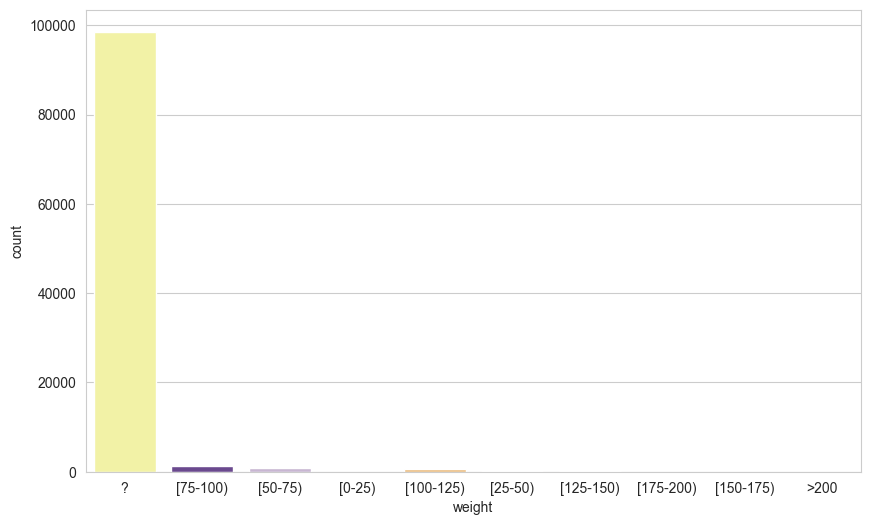

In [49]:
# plot the distribution of weight
plt.figure(figsize=(10, 6))
sns.countplot(x='weight', hue='weight', data=df, palette='Paired_r')
plt.show()

This feature has to many missing values, we will drop it.

In [50]:
df.drop('weight',axis=1,inplace=True)

## The next 3 features:
+ admission_type_id: 9 distinct values indicate types of admission
+ discharge_disposition_id: 29 distinct values indicate different reasons to discharge
+ admission_source_id: 21 distinct values indicates source of admission of patient

### admission_type

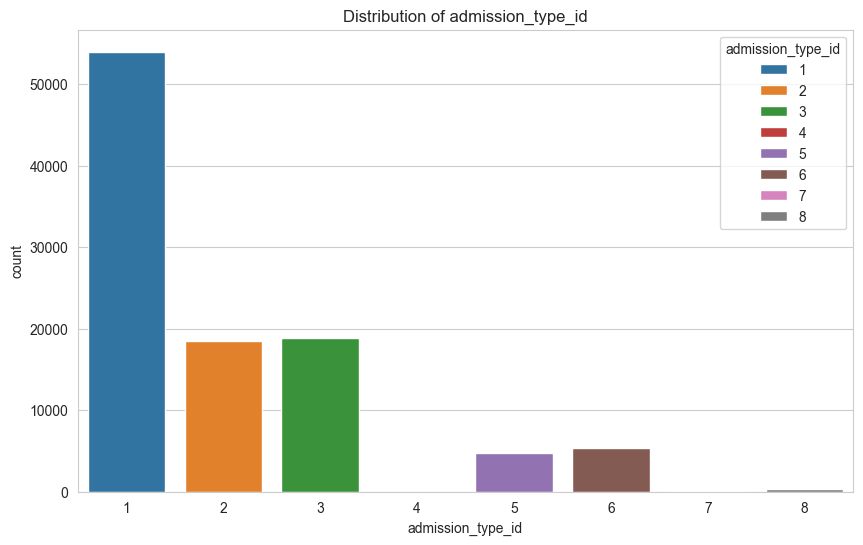

admission_type_id
1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: count, dtype: int64

In [51]:
#plot the distribution of admission_type_id
plt.figure(figsize=(10, 6))

sns.countplot(x='admission_type_id', hue='admission_type_id', data=df, palette='tab10')
plt.title('Distribution of admission_type_id')
plt.show()

df['admission_type_id'].value_counts()

See them in relationship with readmitted

Text(0.5, 1.0, 'Readmission by admission_type_id')

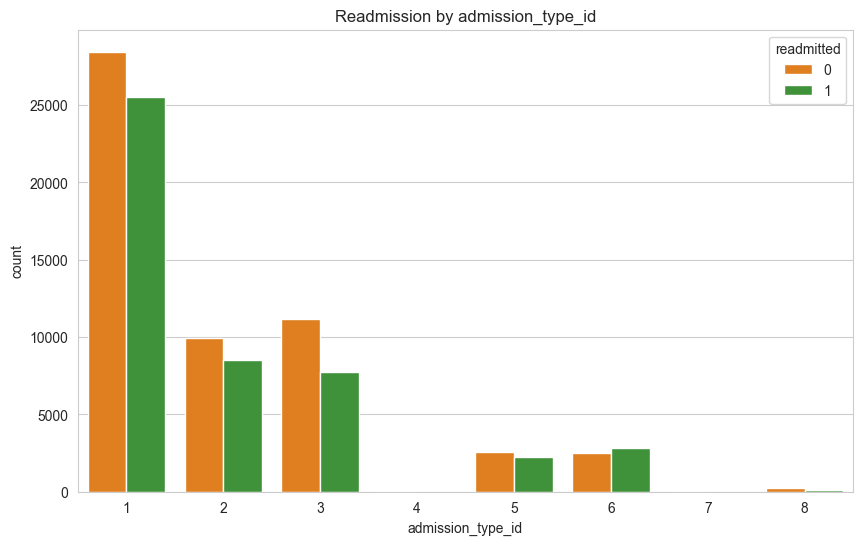

In [52]:
# plot to see the relation between admission_type_id and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='admission_type_id', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by admission_type_id')


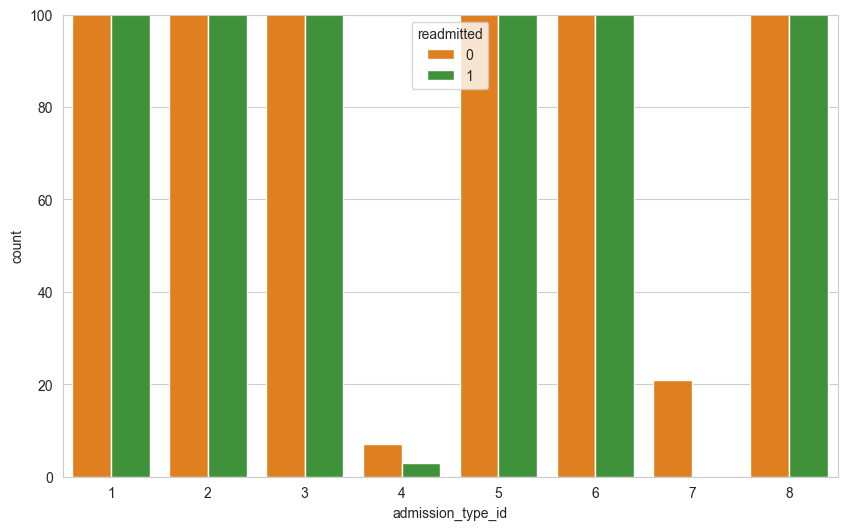

In [53]:
# zoom in to see bar that is too low
plt.figure(figsize=(10, 6))
sns.countplot(x='admission_type_id', hue='readmitted', data=df, palette='Paired_r')
plt.ylim(0, 100)
plt.show()

As we do not know what exactly mapping values for these categories, it is hard to say if this feature really have any impact or not.

### we will look at discharge_disposition_id and admission_source_id

Discharge_disposition_id

<Axes: xlabel='discharge_disposition_id', ylabel='count'>

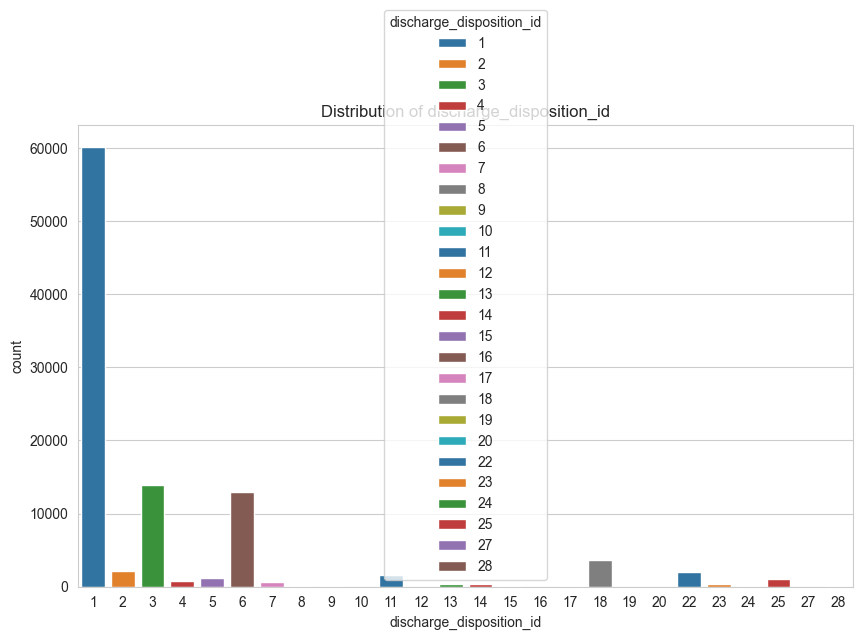

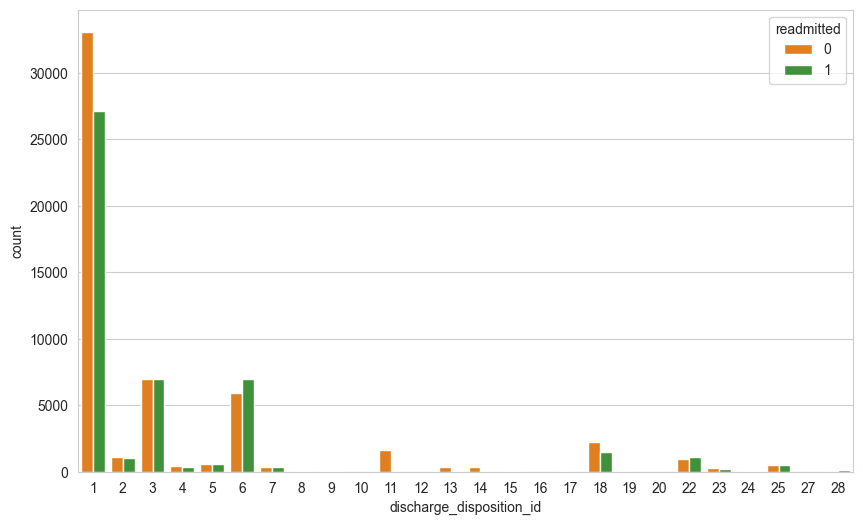

In [54]:
# plot the distribution of discharge_disposition_id
plt.figure(figsize=(10, 6))
sns.countplot(x='discharge_disposition_id', hue='discharge_disposition_id', data=df, palette='tab10')
plt.title('Distribution of discharge_disposition_id')

# plot to see the relation between discharge_disposition_id and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='discharge_disposition_id', hue='readmitted', data=df, palette='Paired_r')


Admission_source_id

<Axes: xlabel='admission_source_id', ylabel='count'>

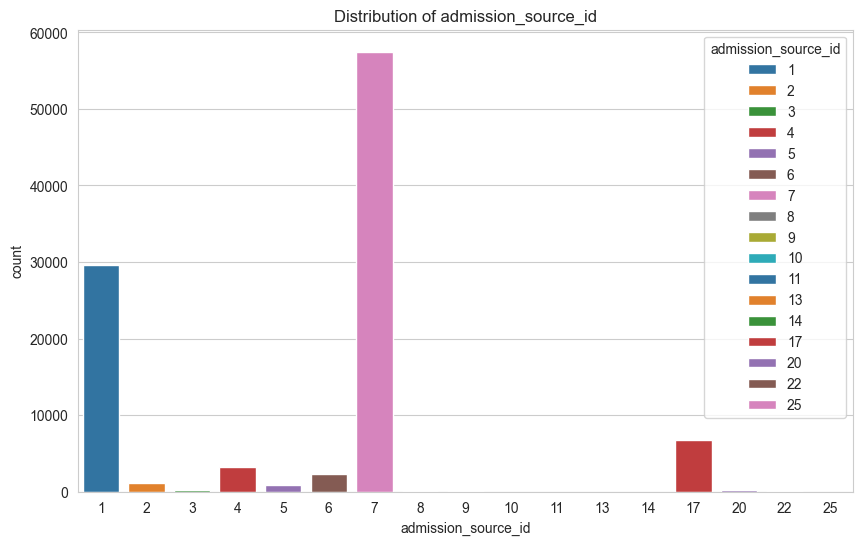

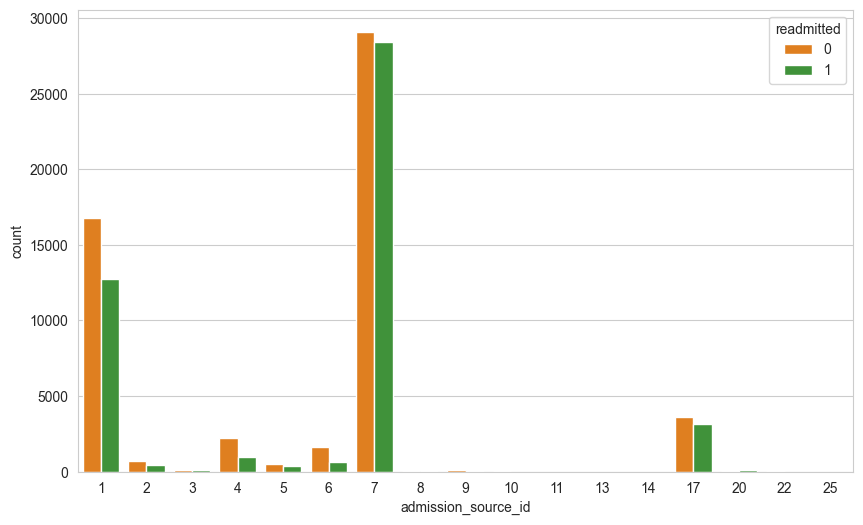

In [55]:
# plot the distribution of admission_source_id
plt.figure(figsize=(10, 6))
sns.countplot(x='admission_source_id', hue='admission_source_id', data=df, palette='tab10')
plt.title('Distribution of admission_source_id')

# plot to see the relation between admission_source_id and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='admission_source_id', hue='readmitted', data=df, palette='Paired_r')

These 3 features do not have exact mapping values so it is hard to say anything about them, we will leave them there.

## Analysis for
+ Time_in_hospital: time patient stayed in hospital
+ Payer_code, medical_specialty: we will leave them alone as these features have the same problem as admissuion_source_id

<Axes: xlabel='time_in_hospital', ylabel='count'>

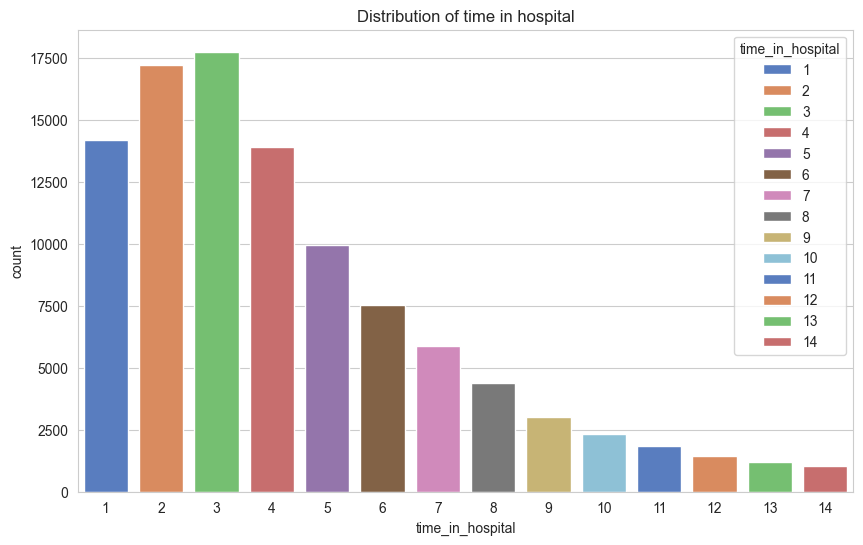

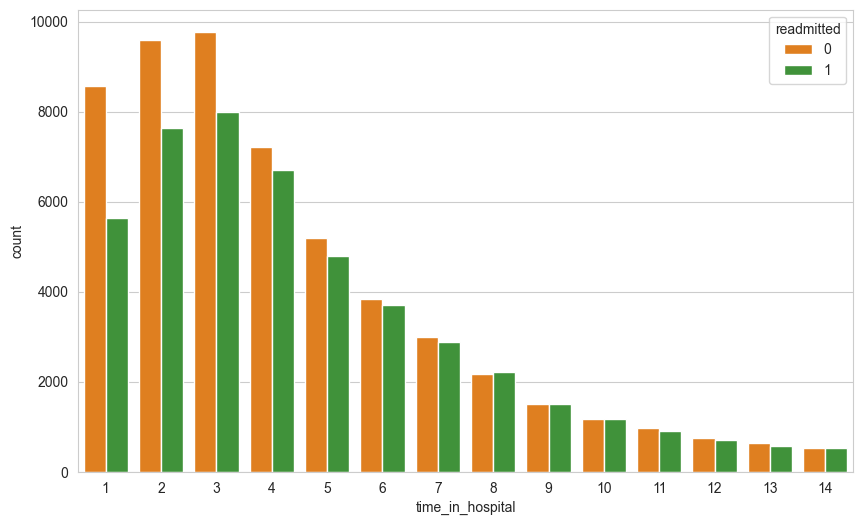

In [56]:
# plot the distribution of time_in_hospital
plt.figure(figsize=(10, 6))
sns.countplot(x='time_in_hospital', hue='time_in_hospital', data=df, palette='muted')
plt.title('Distribution of time in hospital')

# plot to see the relation between time_in_hospital and readmitted, as histogram
plt.figure(figsize=(10, 6))
sns.countplot(x='time_in_hospital', hue='readmitted', data=df, palette='Paired_r')



It is kinda hard to see any pattern as the distribution of readmission and not readmission rate is imbalance for all class in time_in_hospital.
So it is crucial that we see how readmission rate change by looking at percentage of readmission at each class of time_in_hospital

In [57]:
# percentage of patients readmitted by time_in_hospital
percent_readmitted_timeInHospital = []
for i in df['time_in_hospital'].unique():
    percent_readmitted_timeInHospital.append(len(df[(df['time_in_hospital'] == i) & (df['readmitted'] == 1)]) / len(df[df['time_in_hospital'] == i]))
percent_readmitted_timeInHospital


[0.39646677927927926,
 0.44936922730344675,
 0.44304458894565724,
 0.4817581154840563,
 0.48013245033112584,
 0.47107438016528924,
 0.4910220994475138,
 0.5033311125916056,
 0.4906980713432326,
 0.5012809564474808,
 0.49131184507229075,
 0.48194070080862533,
 0.5042131632885447,
 0.4923224568138196]

### ==> It is possible that the more time in hospital the higher rate of readmission, We also see that the gap between orange bar for (not readmitted) and green bar (readmitted) getting smaller as time_in_hospital increase

The majority of patients spent from 1-4 days in hospital. It could be that

### Payer code and Medical_specialty

+ Payer_code represent type of payment
+ Medical_specialty refers to type of a specialty of the admitting physician
==> Let's plot them down

Text(0.5, 1.0, 'Distribution of payer_code')

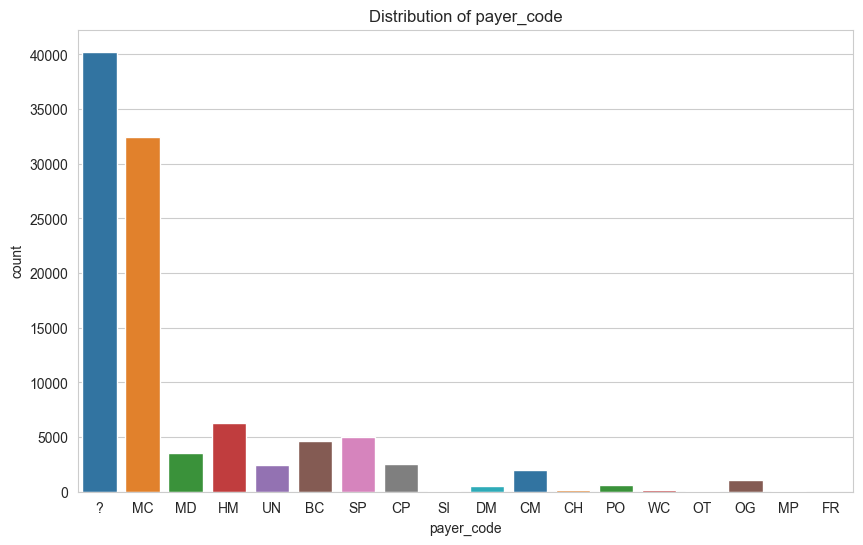

In [58]:
#plot the distribution of payer_code
plt.figure(figsize=(10, 6))
sns.countplot(x='payer_code', hue='payer_code', data=df, palette='tab10')
plt.title('Distribution of payer_code')


Logically, how one patient pay for their hospitalization does not really tell if that patient will be readmitted or not. Plus, number of missing values here in this feature accounts for >30% overall. We'd rather not use this feature

In [59]:
df.drop('payer_code',axis=1,inplace=True)

### Medical_Specialty

Text(0.5, 1.0, 'Distribution of medical_specialty')

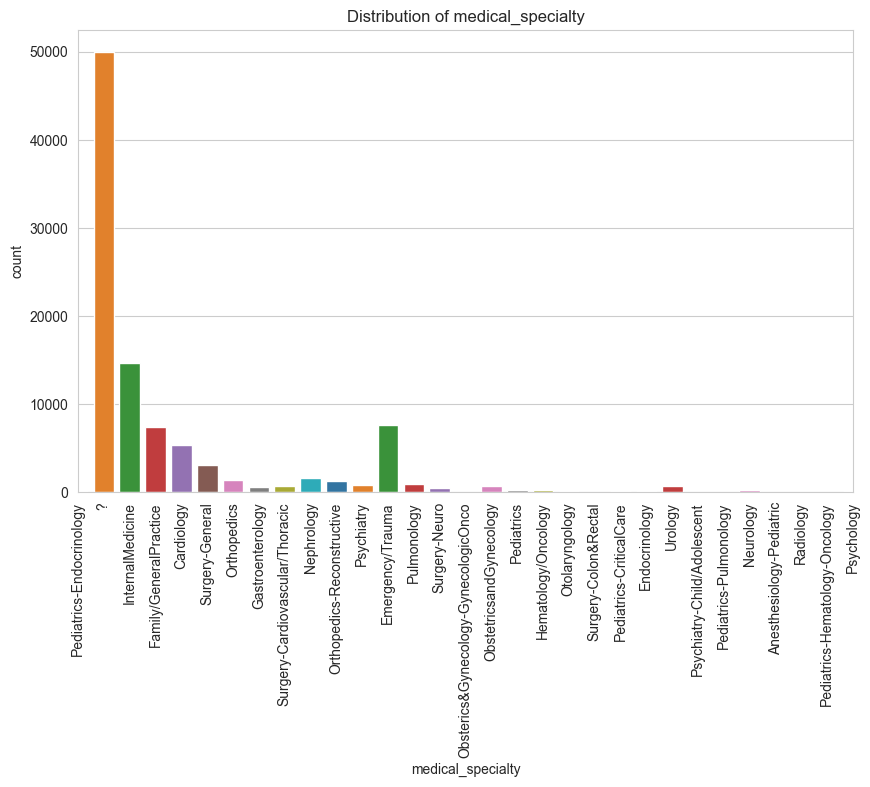

In [60]:
#plot the distribution of medical_specialty
plt.figure(figsize=(10, 6))
sns.countplot(x='medical_specialty', hue='medical_specialty', data=df, palette='tab10')
plt.xticks(rotation=90)
plt.xlim(0, 30)
plt.title('Distribution of medical_specialty')

This information of medical specialty might be a very predictive feature as patients with certain medical specialty could be more likely to be readmitted; however, Missing values are too much in this feature. ==> Not use this

In [61]:
df.drop('medical_specialty',axis=1,inplace=True)   

### num_lab_procedures, num_procedures, num_medications

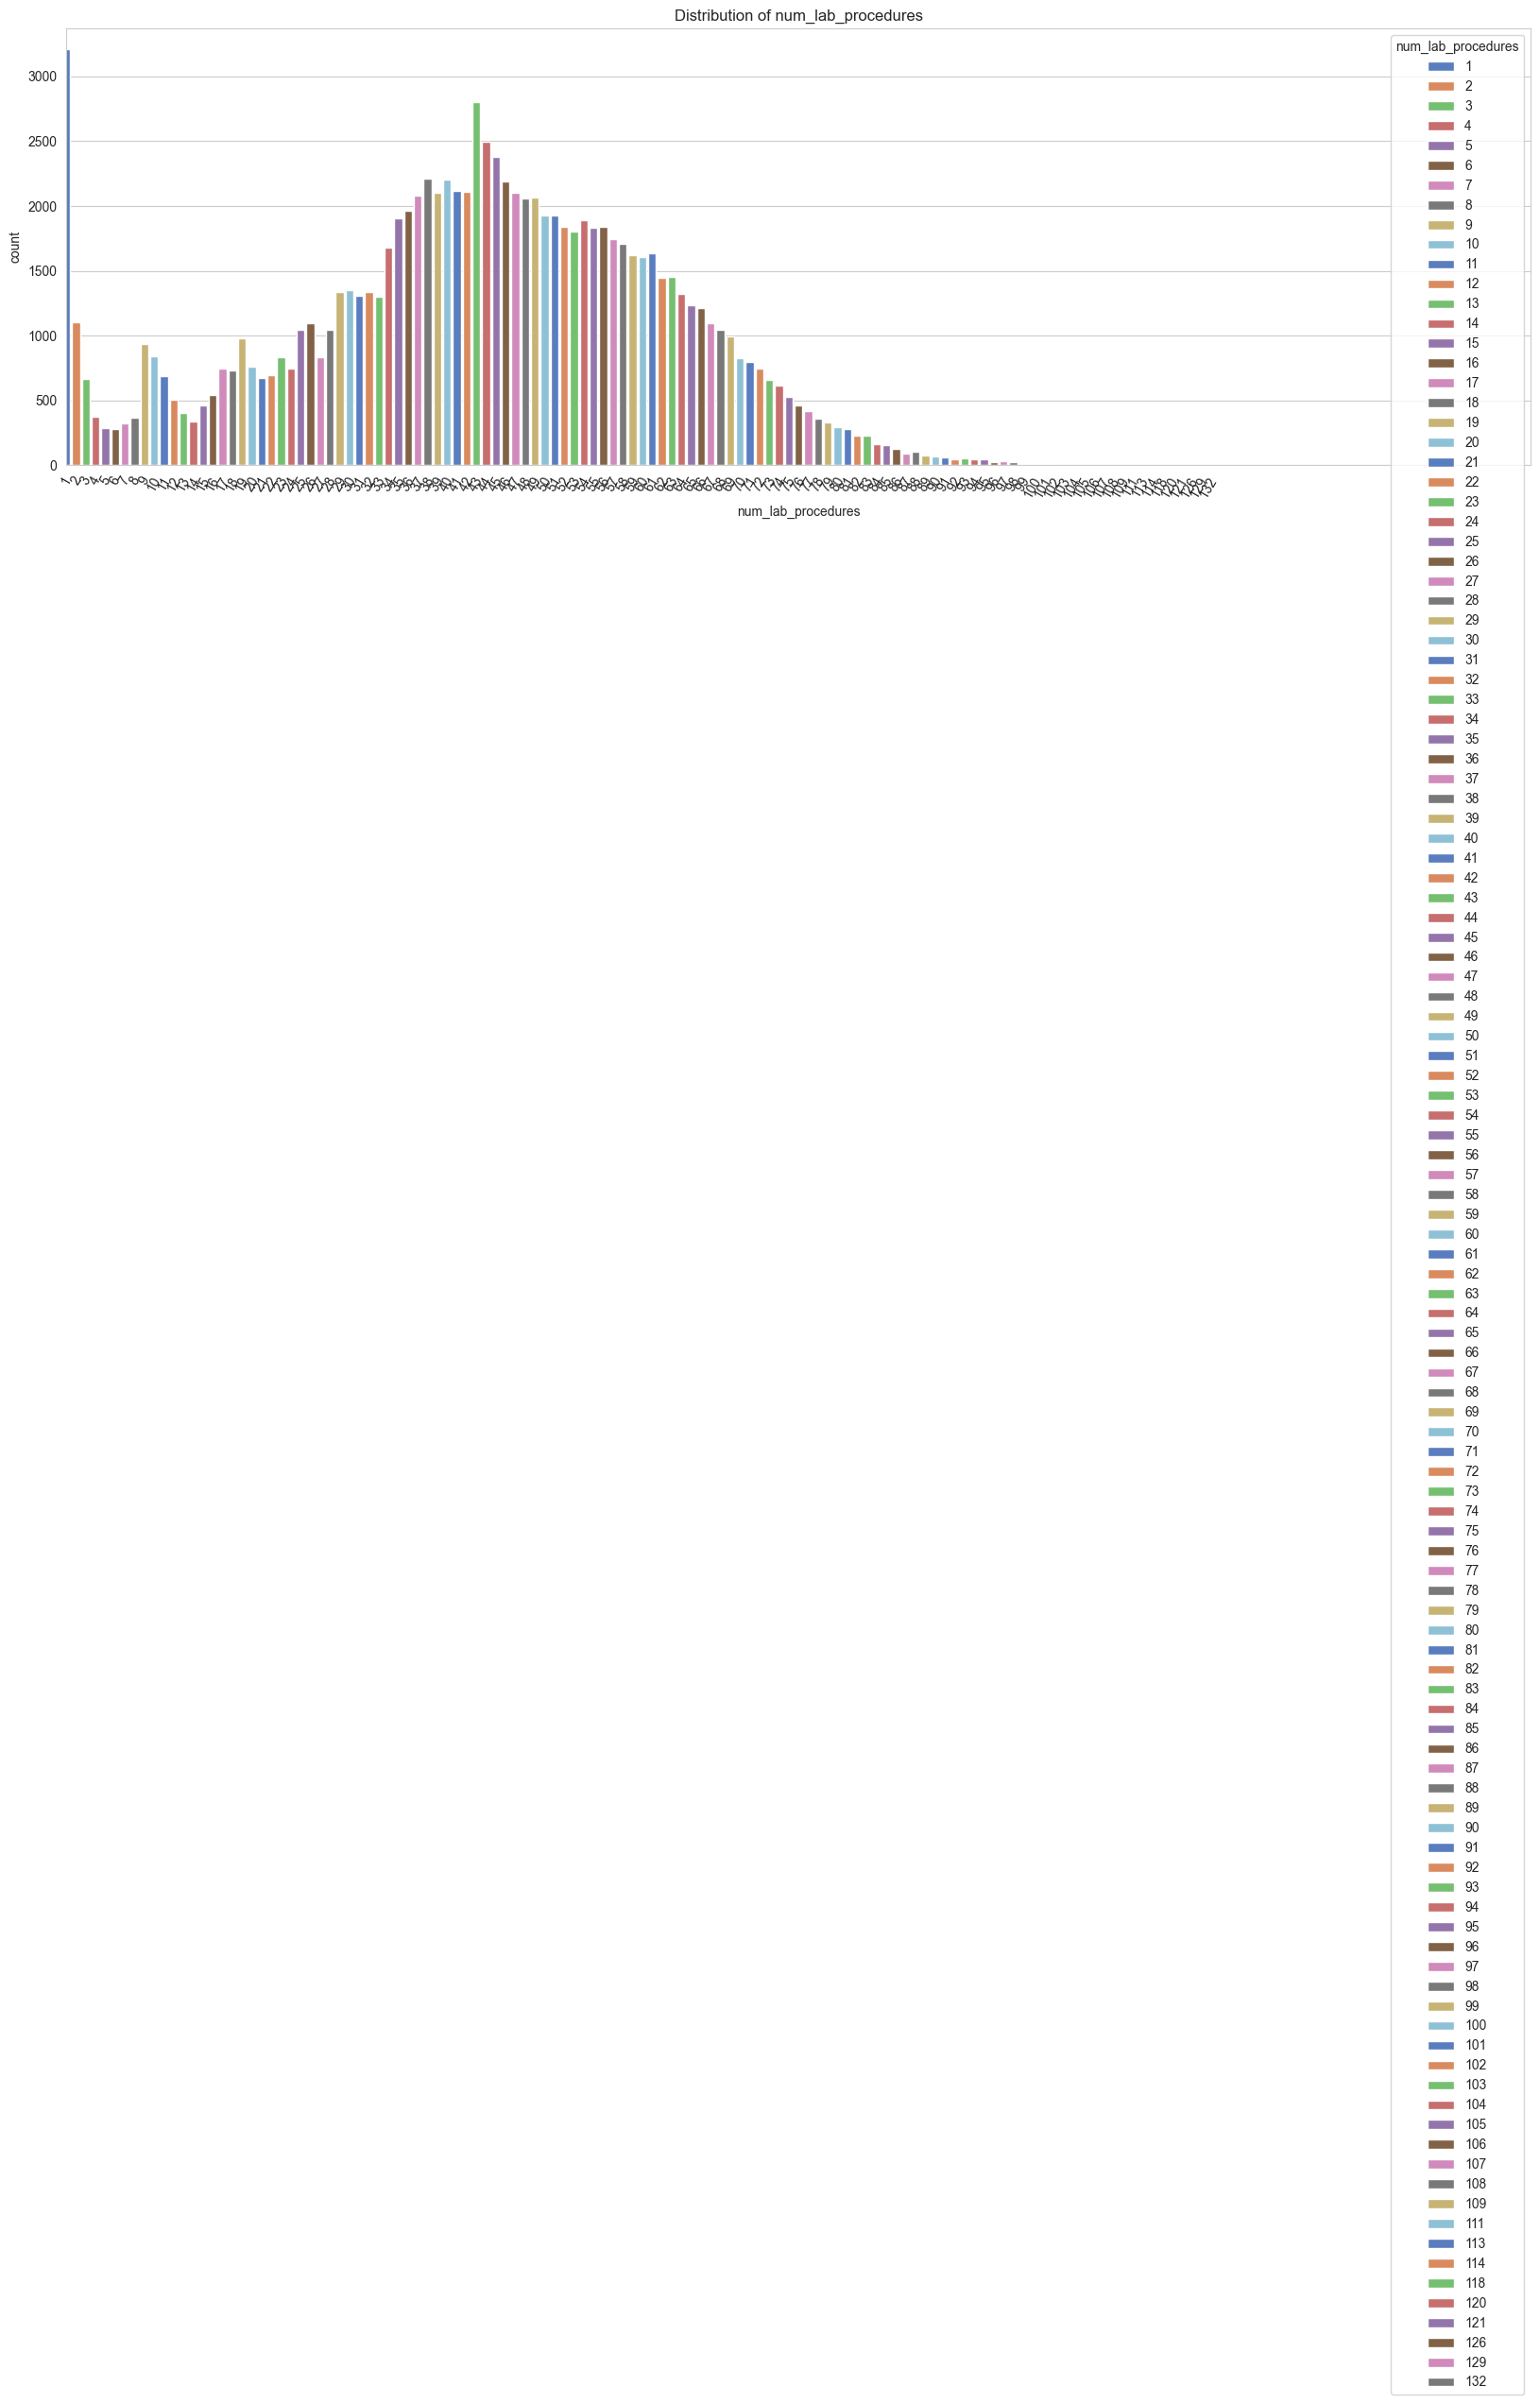

<Figure size 2000x600 with 0 Axes>

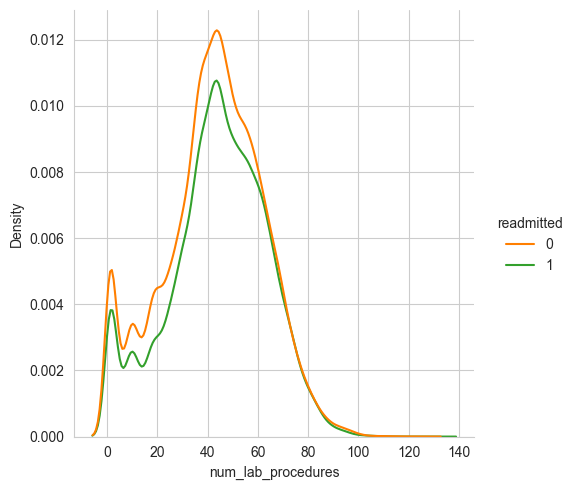

In [62]:
#plot the distribution of num_lab_procedures
plt.figure(figsize=(20, 6))
sns.countplot(x='num_lab_procedures', hue='num_lab_procedures', data=df, palette='muted')
plt.xticks(rotation=60)
plt.xlim(0, 150)
plt.title('Distribution of num_lab_procedures')

plt.figure(figsize=(20, 6))
sns.displot(x='num_lab_procedures', hue='readmitted', data=df, palette='Paired_r',kind='kde')


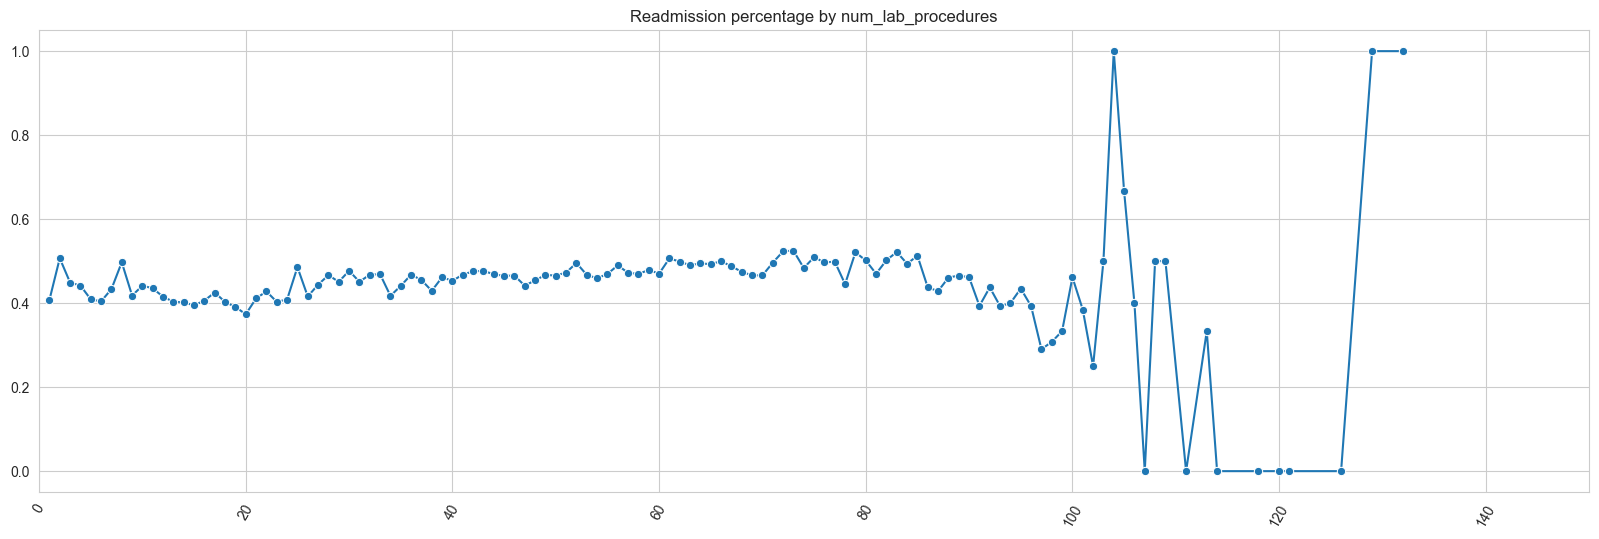

In [63]:
# Readmission percentage by num_lab_procedures
readmission_percentage('num_lab_procedures')

#plot readmission percentage
plt.figure(figsize=(20, 6))
sns.lineplot(x=df['num_lab_procedures'].unique(),y=readmission_percentage('num_lab_procedures'),marker='o')
plt.xticks(rotation=60)
plt.xlim(0, 150)
plt.title('Readmission percentage by num_lab_procedures')
plt.show()

Actually, number of lab procedures varies strongly but it does not have any clear pattern. Except for some certain value where readmission rate is at peak. Based on this, we see that this feature might not be potential for predicting. We will omit it.

In [64]:
df.drop('num_lab_procedures',axis=1,inplace=True)

### num_procedures

Text(0.5, 1.0, 'Readmission by num_procedures')

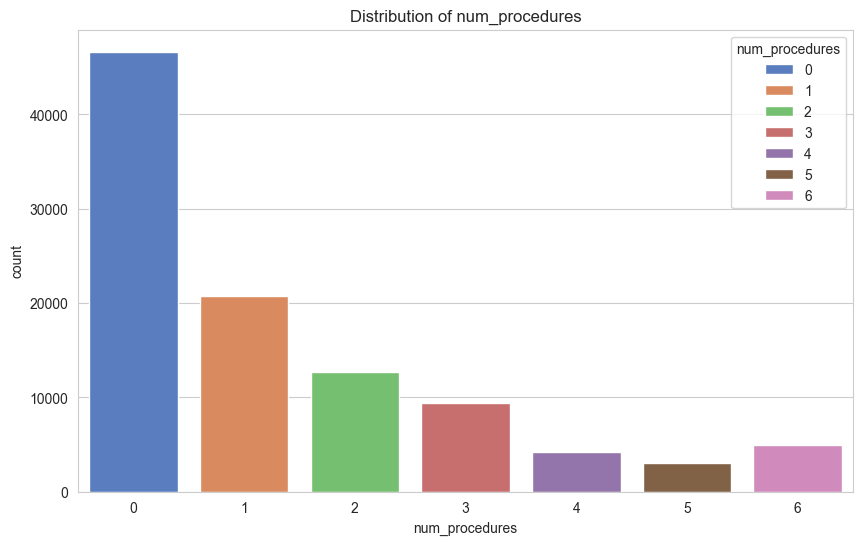

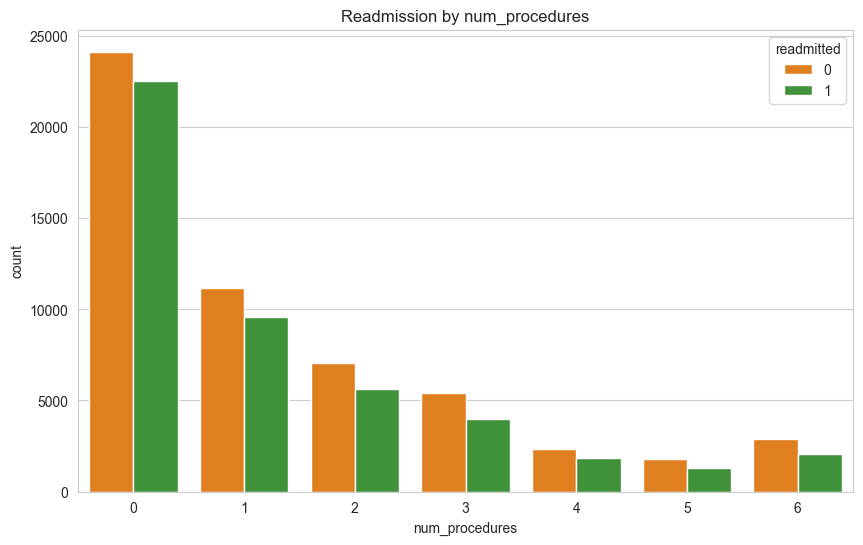

In [65]:
#plot the distribution of num_procedures
plt.figure(figsize=(10, 6))
sns.countplot(x='num_procedures', hue='num_procedures', data=df, palette='muted')
plt.title('Distribution of num_procedures')

plt.figure(figsize=(10, 6))
sns.countplot(x='num_procedures', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by num_procedures')


Text(0.5, 1.0, 'Readmission percentage by num_procedures')

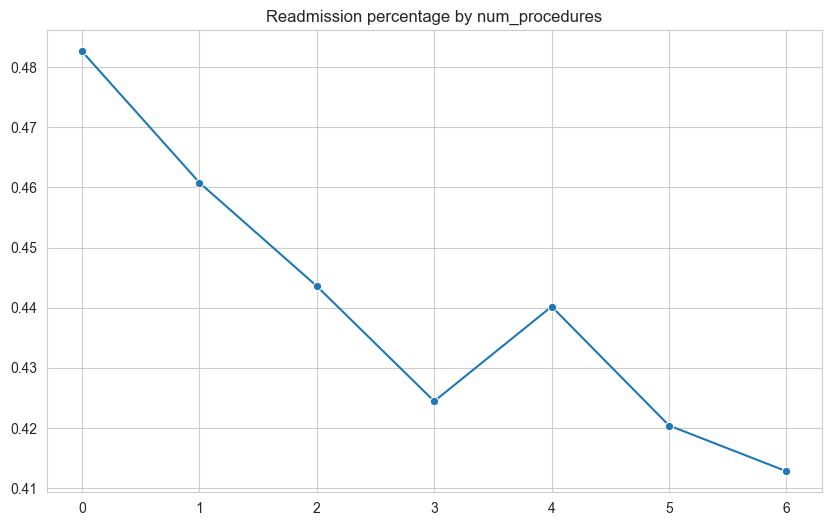

In [66]:
# readmission percentage by num_procedures
readmission_percentage('num_procedures')

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['num_procedures'].unique(),y=readmission_percentage('num_procedures'),marker='o')
plt.title('Readmission percentage by num_procedures')

The readmission rate actually goes down, so we will keep this.

### num_medications

Text(0.5, 1.0, 'Distribution of num_medications over readmission')

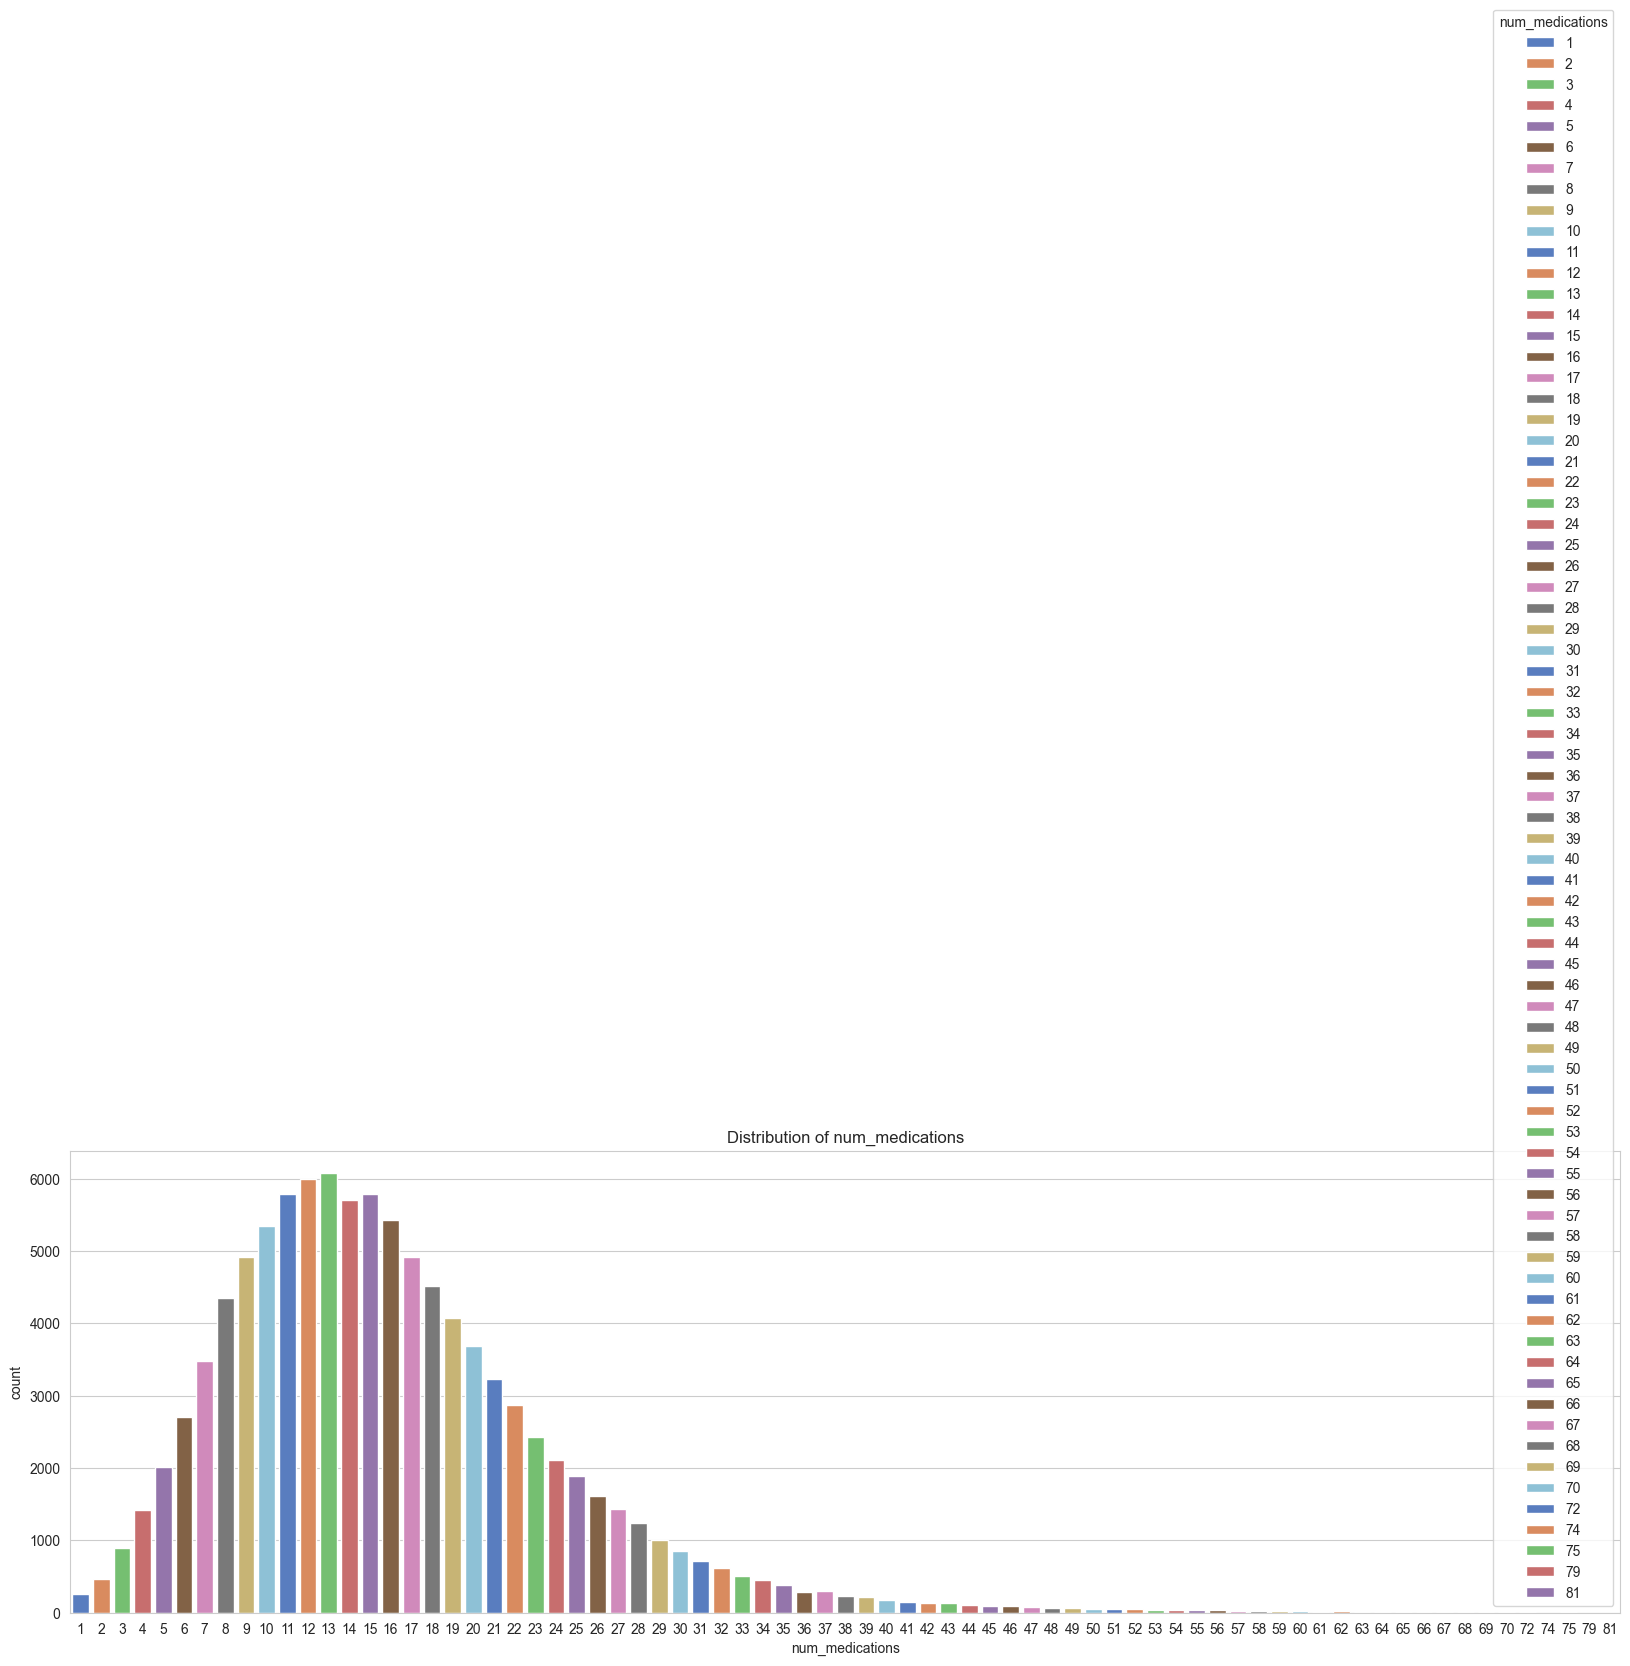

<Figure size 2000x600 with 0 Axes>

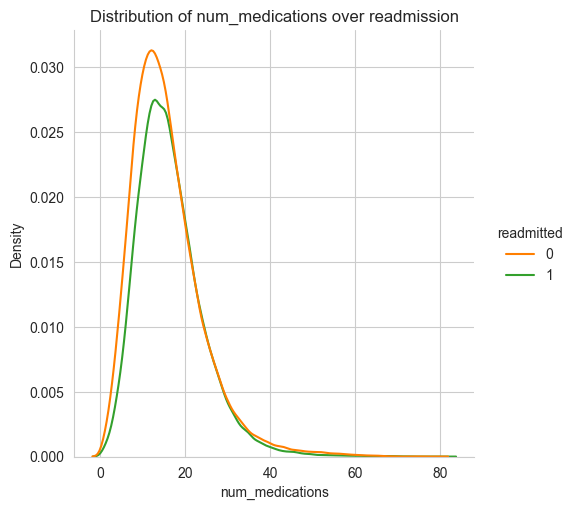

In [67]:
#plot the distribution of num_medications
plt.figure(figsize=(20, 6))
sns.countplot(x='num_medications', hue='num_medications', data=df, palette='muted')
plt.title('Distribution of num_medications')

plt.figure(figsize=(20, 6))
sns.displot(x='num_medications', hue='readmitted', data=df, palette='Paired_r',kind='kde')
plt.title('Distribution of num_medications over readmission')




[0.31679389312977096, 0.5051956665929692, 0.4751889582648702, 0.4953959484346225, 0.4063864001837813, 0.5148606811145511, 0.46319120586275814, 0.49472830494728304, 0.48953039235616996, 0.45297670405522, 0.48152624309392267, 0.5112359550561798, 0.30851063829787234, 0.5024732069249794, 0.49852869053457577, 0.39351320321469574, 0.5050121918179356, 0.46749605747327844, 0.43060231949120836, 0.4895397489539749, 0.42397720333808264, 0.4993016759776536, 0.4952330508474576, 0.34932956951305577, 0.47030497592295345, 0.3771767321230085, 0.46996466431095407, 0.5024875621890548, 0.514461830251304, 0.4503968253968254, 0.3406048587010411, 0.37799043062200954, 0.30444444444444446, 0.507, 0.35714285714285715, 0.43575418994413406, 0.41304347826086957, 0.4246575342465753, 0.4425087108013937, 0.46799116997792495, 0.5077319587628866, 0.32727272727272727, 0.33858267716535434, 0.375, 0.4232081911262799, 0.20930232558139536, 0.4780701754385965, 0.4431818181818182, 0.24242424242424243, 0.2777777777777778, 0.37

Text(0.5, 1.0, 'Readmission percentage by num_medications')

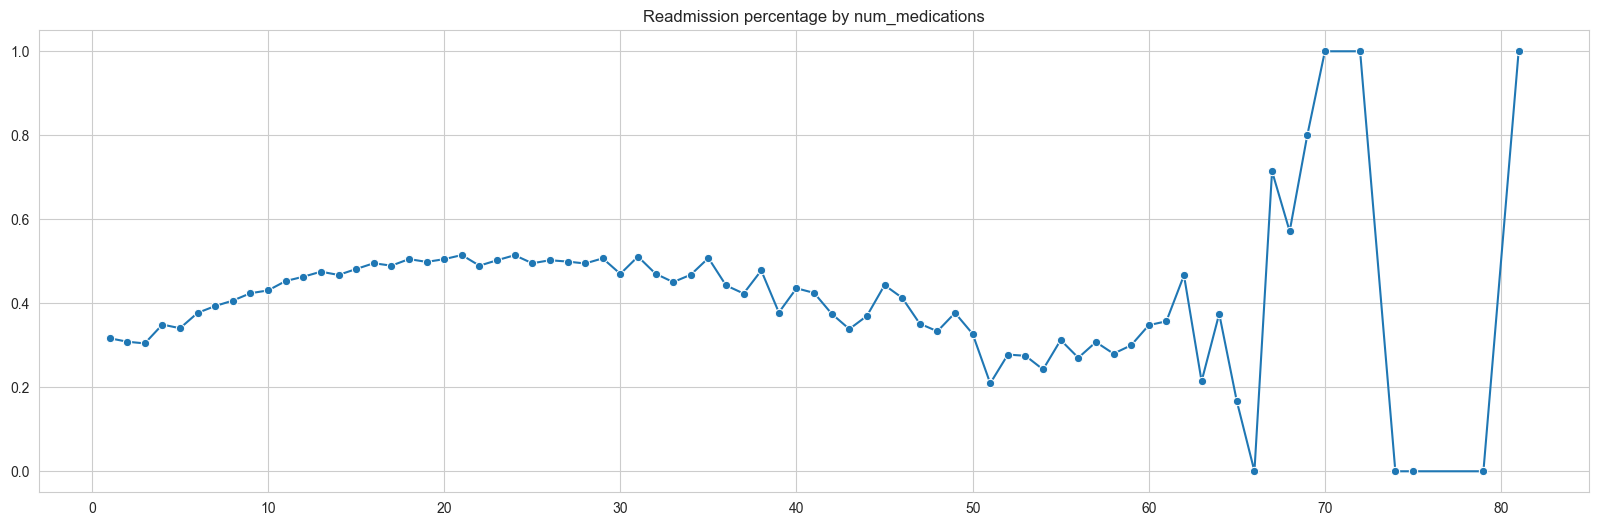

In [68]:
# readmission percentage by num_medications
print(readmission_percentage('num_medications'))

#plot line plot
plt.figure(figsize=(20, 6))
sns.lineplot(x=df['num_medications'].unique(),y=readmission_percentage('num_medications'),marker='o')
plt.title('Readmission percentage by num_medications')

This feature has the same problem with num_lab_procedures. We do not use this.

In [69]:
df.drop('num_medications',axis=1,inplace=True)

### number_outpatient, number_emergency, number_inpatient

number_outpatient: Number of outpatient visits of the patient in the year preceding the encounter

Text(0.5, 1.0, 'Readmission by number_outpatient')

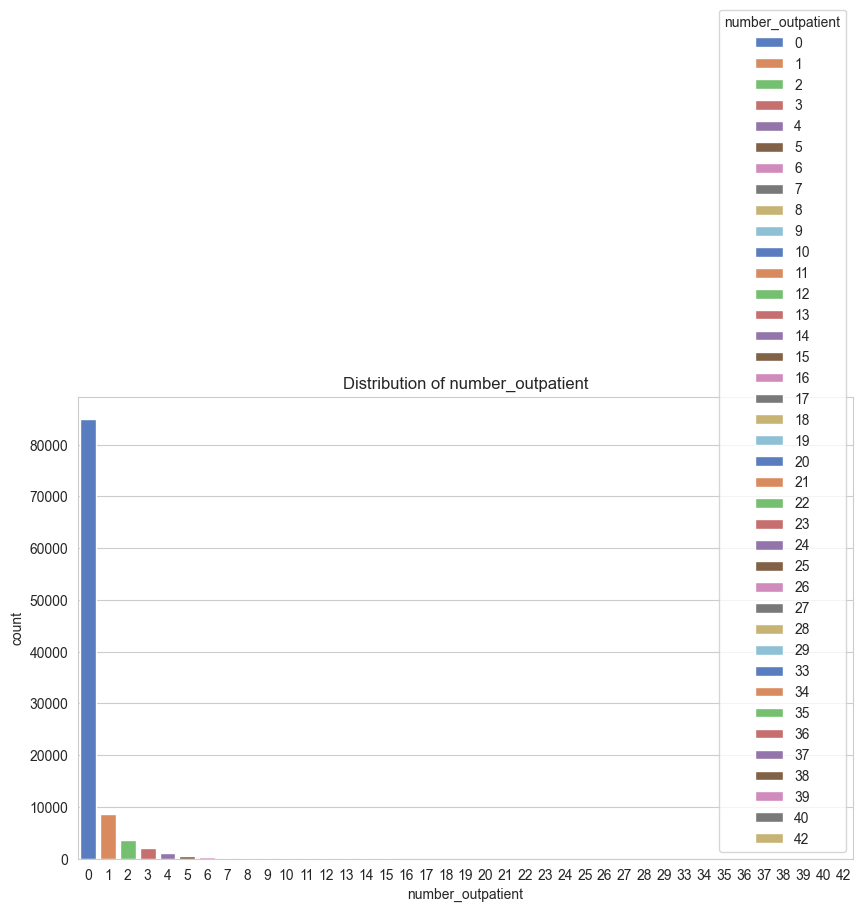

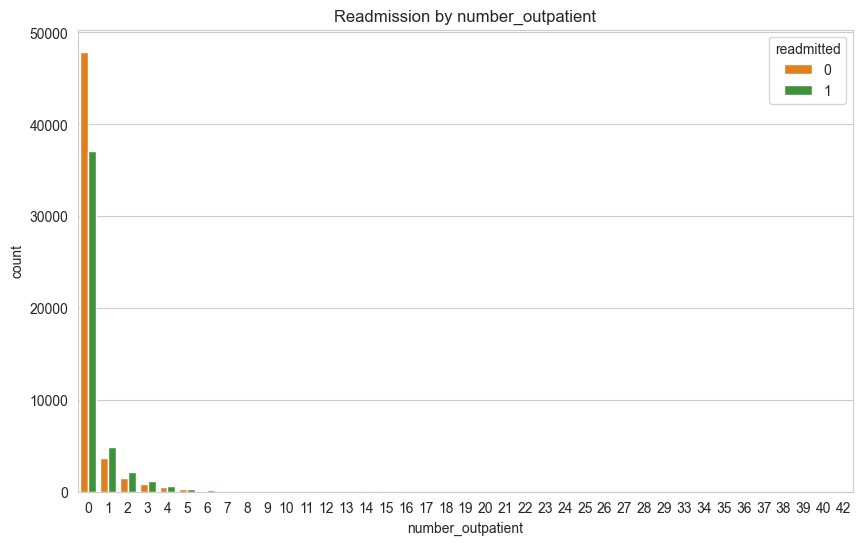

In [70]:
#plot the distribution of number_outpatient
plt.figure(figsize=(10, 6))
sns.countplot(x='number_outpatient', hue='number_outpatient', data=df, palette='muted')
plt.title('Distribution of number_outpatient')

plt.figure(figsize=(10, 6))
sns.countplot(x='number_outpatient', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by number_outpatient')

[0.43650840321309703, 0.6010016694490818, 0.5737685737685738, 0.574108818011257, 0.6903225806451613, 0.6144578313253012, 0.5744368266405485, 0.45918367346938777, 0.5878070973612375, 0.7, 0.7142857142857143, 0.6402640264026402, 0.5714285714285714, 0.8, 0.7017543859649122, 0.6451612903225806, 0.7857142857142857, 0.5333333333333333, 0.5714285714285714, 0.5, 0.5, 0.5, 0.5, 0.8, 1.0, 1.0, 1.0, 0.3333333333333333, 1.0, 1.0, 1.0, 0.5, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0.5, 1.0, 'Readmission percentage by number_outpatient')

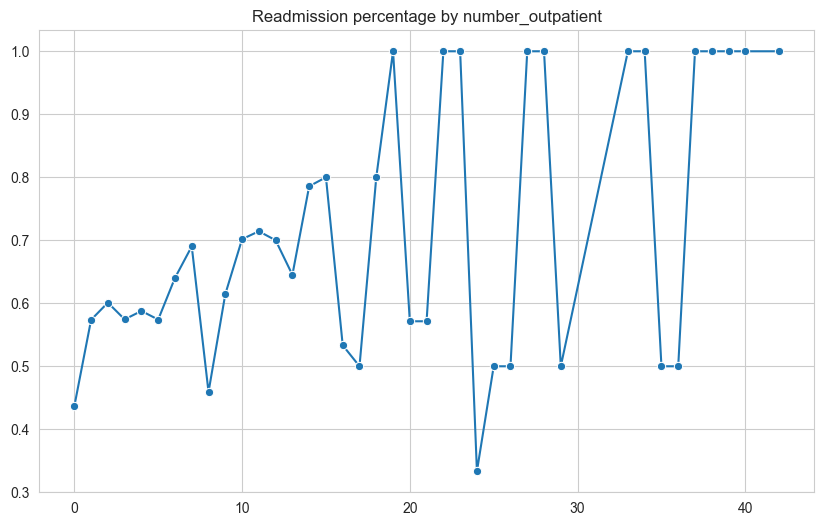

In [71]:
# readmission percentage by number_outpatient
print(readmission_percentage('number_outpatient'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['number_outpatient'].unique(),y=readmission_percentage('number_outpatient'),marker='o')
plt.title('Readmission percentage by number_outpatient')

The values in this line plot fluctuates a lot; But different from the one of num_medications, most high values of number_outpatient have high readmission rate except for some outliers, we will process those later. So we will use this.

### number_emergency

Text(0.5, 1.0, 'Readmission by number_emergency')

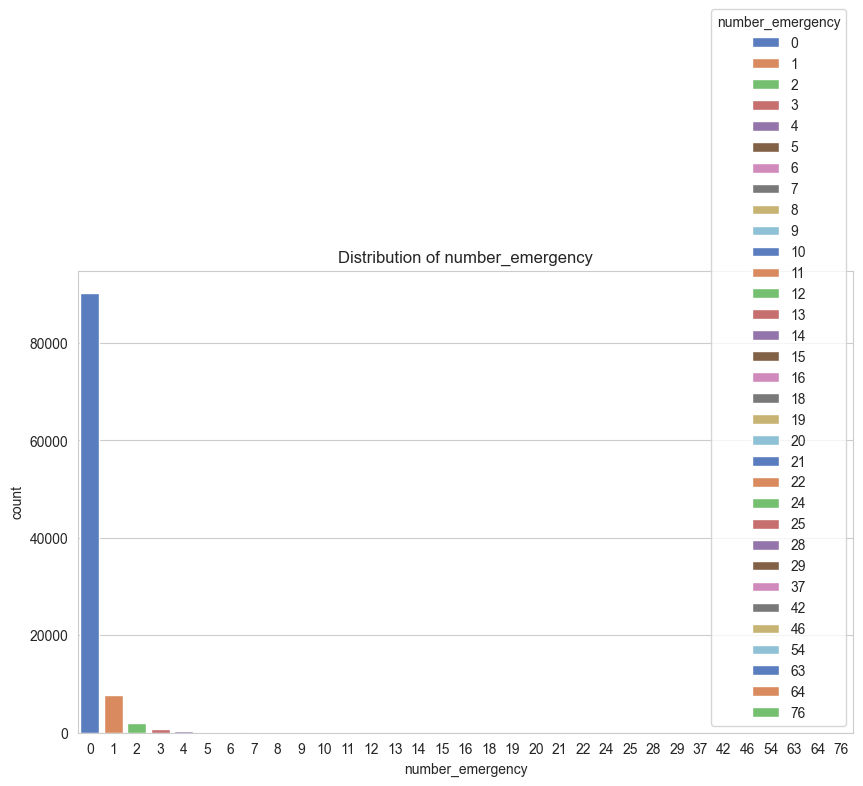

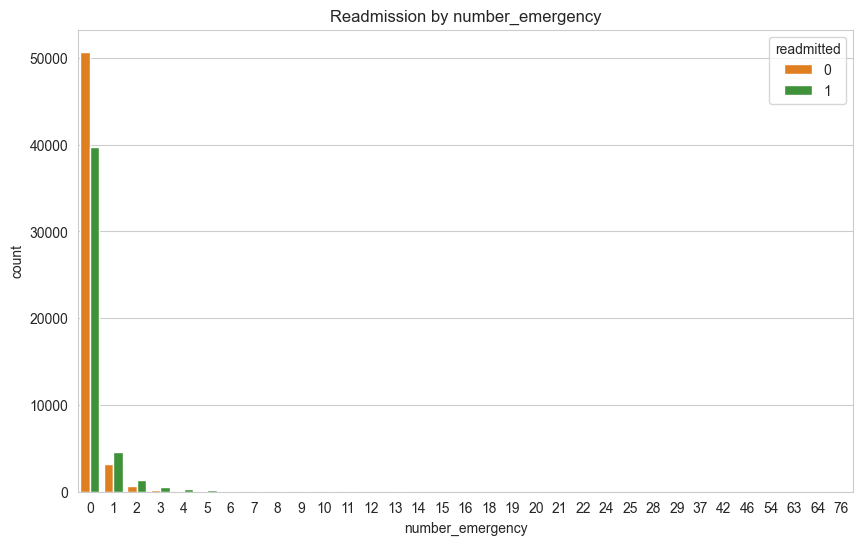

In [72]:
#plot the distribution of number_emergency
plt.figure(figsize=(10, 6))
sns.countplot(x='number_emergency', hue='number_emergency', data=df, palette='muted')
plt.title('Distribution of number_emergency')

plt.figure(figsize=(10, 6))
sns.countplot(x='number_emergency', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by number_emergency')

[0.43894316409059225, 0.592939950501498, 0.6709108716944172, 0.8155080213903744, 0.7186206896551725, 0.9090909090909091, 0.8020833333333334, 0.9041095890410958, 0.8404255319148937, 0.82, 1.0, 0.0, 1.0, 0.9166666666666666, 1.0, 0.8, 0.8695652173913043, 1.0, 1.0, 0.6666666666666666, 1.0, 0.8, 1.0, 0.75, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]


Text(0.5, 1.0, 'Readmission percentage by number_emergency')

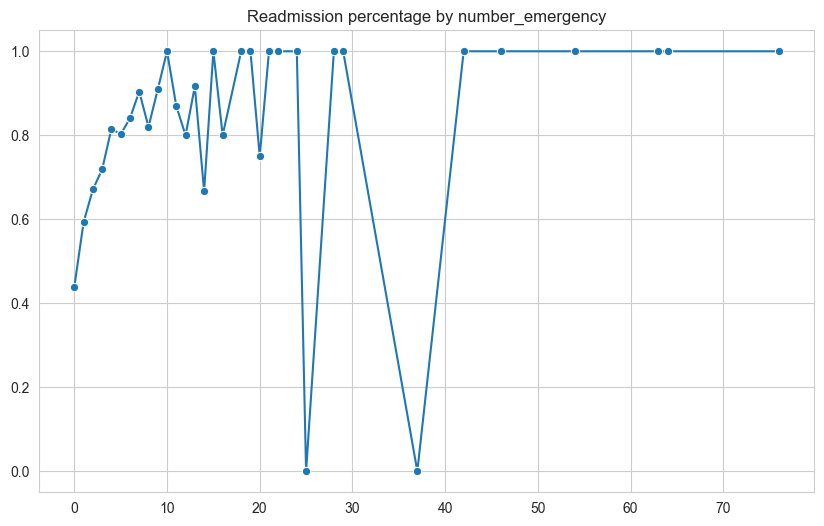

In [73]:
# readmission percentage by number_emergency
print(readmission_percentage('number_emergency'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['number_emergency'].unique(),y=readmission_percentage('number_emergency'),marker='o')
plt.title('Readmission percentage by number_emergency')

The trend is increasing, same to number_outpatient, outliers appear at value around 25 and 37 of number emergency. We will keep this.

### number_inpatient

Text(0.5, 1.0, 'Readmission by number_inpatient')

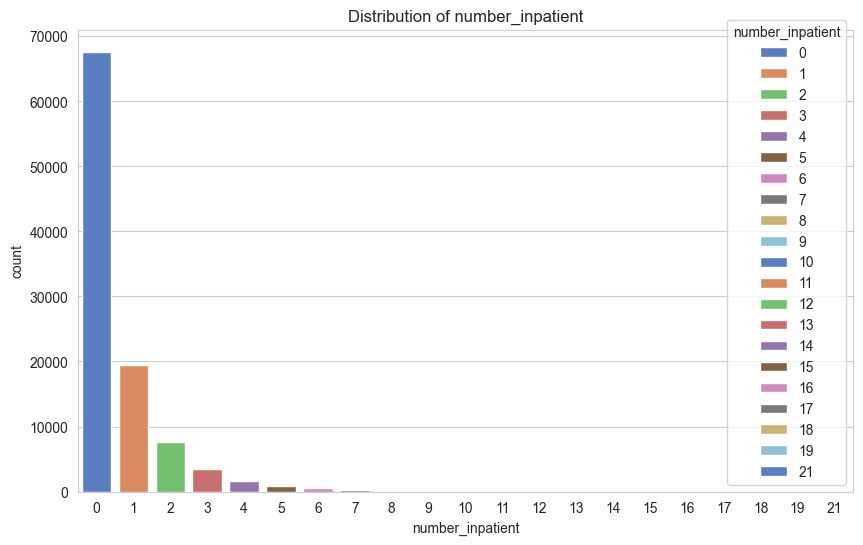

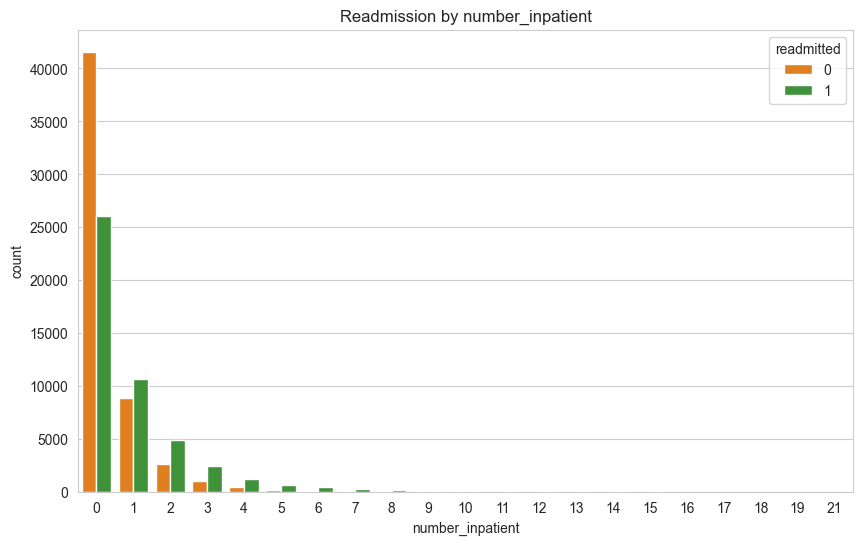

In [74]:
#plot the distribution of number_inpatient
plt.figure(figsize=(10, 6))
sns.countplot(x='number_inpatient', hue='number_inpatient', data=df, palette='muted')
plt.title('Distribution of number_inpatient')

plt.figure(figsize=(10, 6))
sns.countplot(x='number_inpatient', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by number_inpatient')

[0.38494750850214404, 0.5476153885559142, 0.6493523658472112, 0.6971562591615362, 0.8416666666666667, 0.8004926108374384, 0.7422934648581998, 0.8097014925373134, 0.9072847682119205, 0.8828828828828829, 1.0, 0.8524590163934426, 1.0, 1.0, 0.8823529411764706, 0.9, 1.0, 0.6666666666666666, 1.0, 1.0, 1.0]


Text(0.5, 1.0, 'Readmission percentage by number_inpatient')

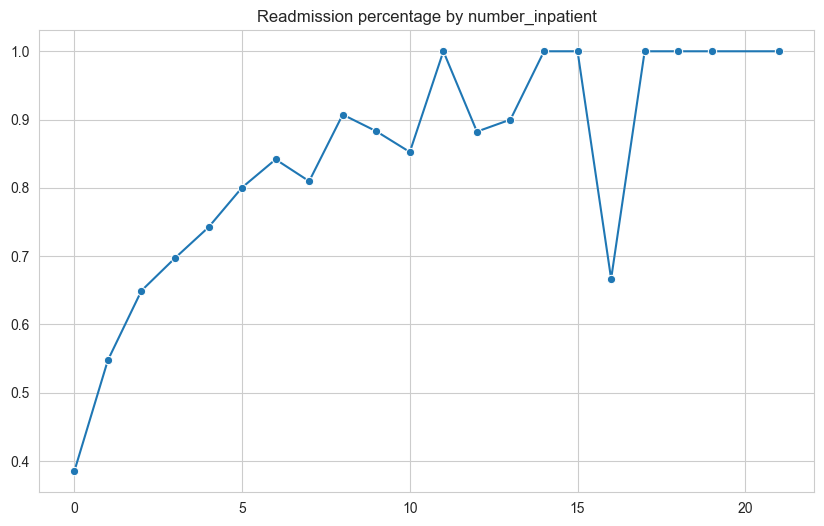

In [75]:
# readmission percentage by number_inpatient
print(readmission_percentage('number_inpatient'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['number_inpatient'].unique(),y=readmission_percentage('number_inpatient'),marker='o')
plt.title('Readmission percentage by number_inpatient')

The higher the number_inpatient values, the higher the readmission rate. This feature is potential. 

## Diag_1,diag_2,diag_3

### diag_1: The primary diagnosis

In [76]:
# # readmission percentage by diag_1
# # print(readmission_percentage('diag_1'))

# # plot line plot
# plt.figure(figsize=(30, 10))
# plt.ylim(0, 5)
# sns.lineplot(x=df['diag_1'].unique(),y=readmission_percentage('diag_1'),marker='o')
# plt.title('Readmission percentage by diag_1')

### diag_2: Secondary diagnosis

In [77]:
# # readmission percentage by diag_2
# plt.figure(figsize=(30, 10))
# plt.ylim(0, 5)
# sns.lineplot(x=df['diag_2'].unique(),y=readmission_percentage('diag_2'),marker='o')
# plt.title('Readmission percentage by diag_2')


### diag_3 : Additional secondary diagnosis

In [78]:
# # readmission percentage by diag_3
# plt.figure(figsize=(30, 10))
# plt.ylim(0, 5)
# sns.lineplot(x=df['diag_3'].unique(),y=readmission_percentage('diag_3'),marker='o')
# plt.title('Readmission percentage by diag_3')


+ For these 3 diag features, we do not know mapping values, so we will do nothing of this.

### number_diagnoses

Text(0.5, 1.0, 'Readmission by number_diagnoses')

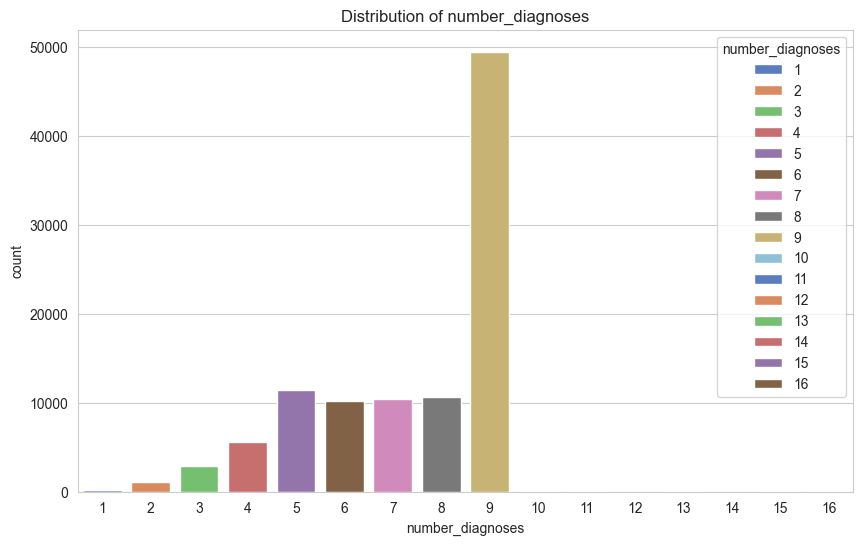

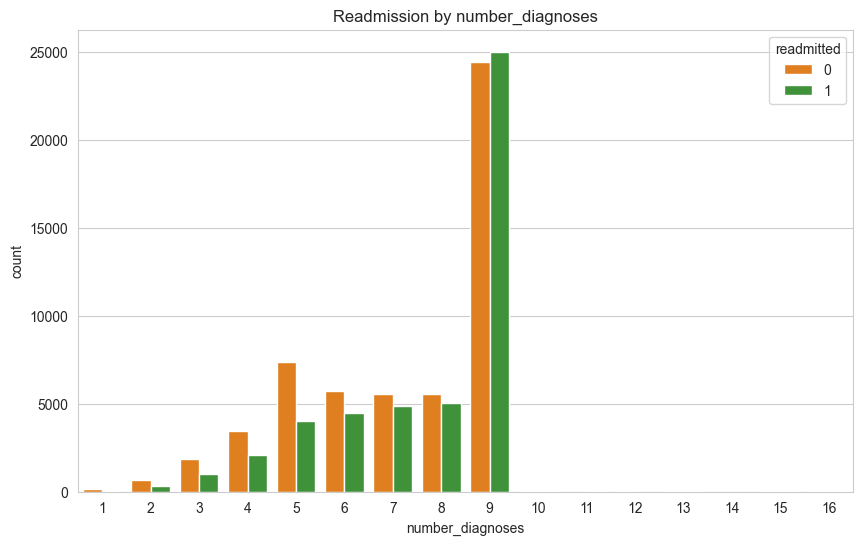

In [79]:
# plot the distribution of number_diagnoses
plt.figure(figsize=(10, 6))
sns.countplot(x='number_diagnoses', hue='number_diagnoses', data=df, palette='muted')
plt.title('Distribution of number_diagnoses')


# plot to see the relation between number_diagnoses and readmitted
plt.figure(figsize=(10, 6))
sns.countplot(x='number_diagnoses', hue='readmitted', data=df, palette='Paired_r')
plt.title('Readmission by number_diagnoses')

[0.2374429223744292, 0.5058414520758379, 0.43844109831709477, 0.46675647070143367, 0.3545159308347231, 0.4758854559155991, 0.34285714285714286, 0.37258443200288965, 0.3284457478005865, 0.4, 0.4444444444444444, 0.5625, 0.5, 0.47058823529411764, 0.7272727272727273, 0.5714285714285714]


Text(0.5, 1.0, 'Readmission percentage by number_diagnoses')

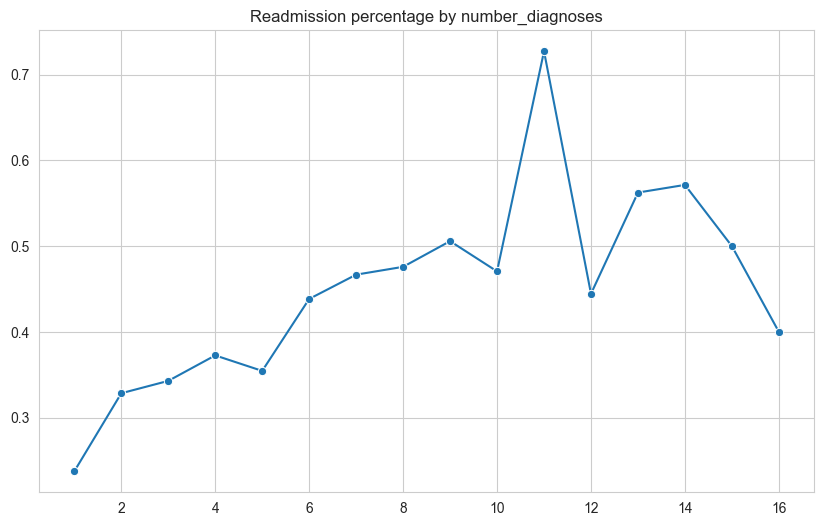

In [80]:

# readmission percentage by number_diagnoses
print(readmission_percentage('number_diagnoses'))

#plot line plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['number_diagnoses'].unique(),y=readmission_percentage('number_diagnoses'),marker='o')
plt.title('Readmission percentage by number_diagnoses')

The more number of diagnoses, the higher the readmission rate. It is quite clear even though the rate getting lower when number_diagnoses >= 12

In [81]:
#There is no data for these 2 medicines so we can drop it.
df = df.drop(['citoglipton', 'examide'], axis=1)

In [82]:
df.shape

(101766, 41)

### *We also got analysis for all the drugs used in dataset, but they are all included in file drugs.ipynb

# Handling Outliers

In [83]:
df_new = df.copy()
summary(df_new)

,dtypes,missing#,missing%,unique,count
encounter_id,int64,0,0.000000,101766,101766
patient_nbr,int64,0,0.000000,71518,101766
gender,object,3,0.000029,3,101766
age,object,0,0.000000,10,101766
admission_type_id,int64,0,0.000000,8,101766
discharge_disposition_id,int64,0,0.000000,26,101766
admission_source_id,int64,0,0.000000,17,101766
time_in_hospital,int64,0,0.000000,14,101766
num_procedures,int64,0,0.000000,7,101766
number_outpatient,int64,0,0.000000,39,101766


In [84]:
# impute missing values for diag_1, diag_2, diag_3, gender
df_new['diag_1'].replace('?',np.nan,inplace=True)
df_new['diag_2'].replace('?',np.nan,inplace=True)
df_new['diag_3'].replace('?',np.nan,inplace=True)
df_new['gender'].replace('Unknown/Invalid',np.nan,inplace=True)

df_new.head()

,encounter_id,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_procedures,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,encounter_num
0,2278392,8222157,Female,[0-10),6,25,1,1,0,0,0,0,250.83,NaN,NaN,1,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,0,1
1,149190,55629189,Female,[10-20),1,1,7,3,0,0,0,0,276,250.01,255,9,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,1,1
2,64410,86047875,Female,[20-30),1,1,7,2,5,2,0,1,648,250,V27,6,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0,1
3,500364,82442376,Male,[30-40),1,1,7,2,1,0,0,0,8,250.43,403,7,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0,1
4,16680,42519267,Male,[40-50),1,1,7,1,0,0,0,0,197,157,250,5,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0,1


In [85]:
#imputation
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df_new['diag_1'] = imputer.fit_transform(df_new[['diag_1']]).ravel()
df_new['diag_2'] = imputer.fit_transform(df_new[['diag_2']]).ravel()
df_new['diag_3'] = imputer.fit_transform(df_new[['diag_3']]).ravel()
df_new['gender'] = imputer.fit_transform(df_new[['gender']]).ravel()

summary(df_new)

,dtypes,missing#,missing%,unique,count
encounter_id,int64,0,0.0,101766,101766
patient_nbr,int64,0,0.0,71518,101766
gender,object,0,0.0,2,101766
age,object,0,0.0,10,101766
admission_type_id,int64,0,0.0,8,101766
discharge_disposition_id,int64,0,0.0,26,101766
admission_source_id,int64,0,0.0,17,101766
time_in_hospital,int64,0,0.0,14,101766
num_procedures,int64,0,0.0,7,101766
number_outpatient,int64,0,0.0,39,101766


In [86]:
# Handling Outliers

num_col = df_new.select_dtypes(exclude=['object']).columns.to_list()
num_col.remove('readmitted')
num_col.remove('encounter_id')
num_col.remove('patient_nbr')
num_col.remove('admission_type_id')
num_col.remove('discharge_disposition_id')
num_col.remove('admission_source_id')

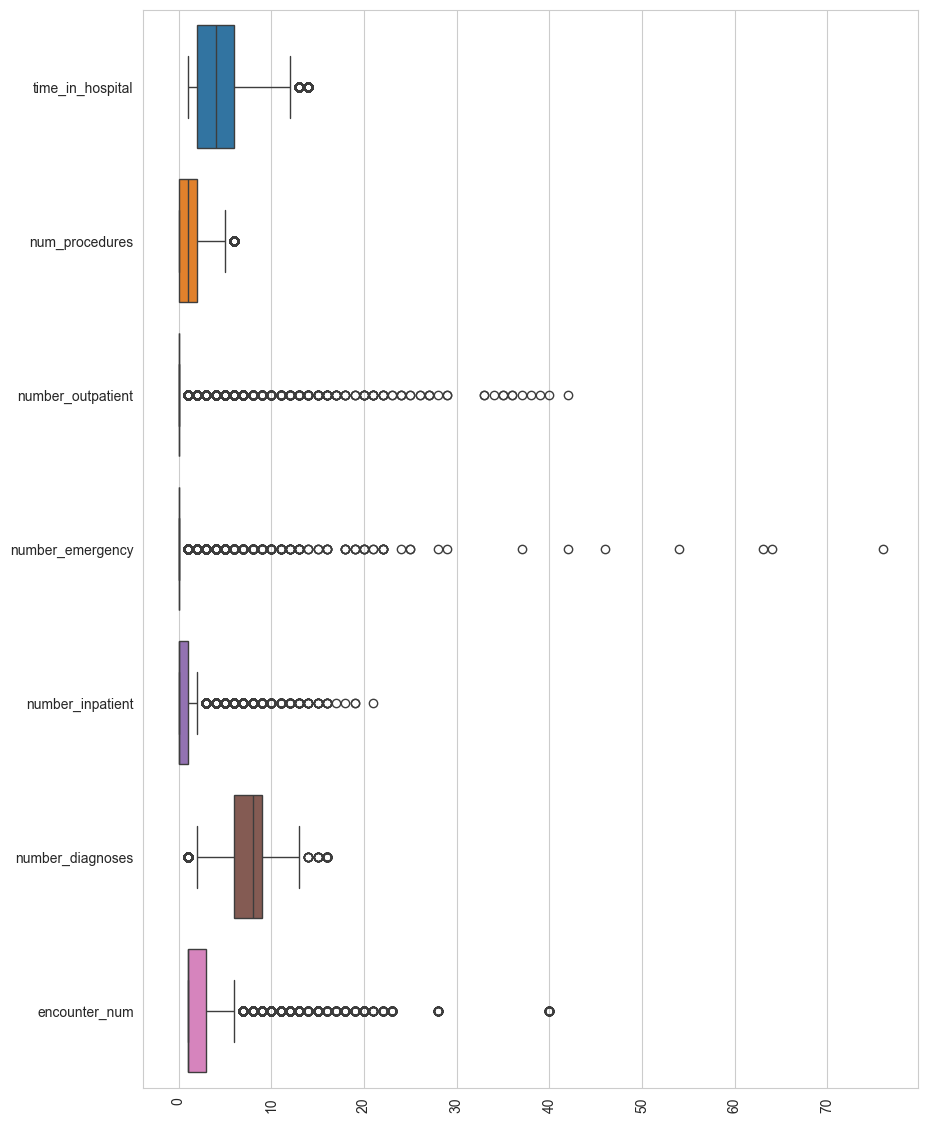

{'time_in_hospital': 2252,
 'num_procedures': 4954,
 'number_outpatient': 16739,
 'number_emergency': 11383,
 'number_inpatient': 7049,
 'number_diagnoses': 281,
 'encounter_num': 4824}

In [87]:
# plot boxplot for numeric features
plt.figure(figsize=(10, 14))
# make the plot horizontal
sns.boxplot(data=df_new[num_col],vert=False,orient='h')
plt.xticks(rotation=90)
plt.show()


# Based on those boxplots, we count the number of outliers for each feature
outlier_count = {}
for i in num_col:
    q1 = df_new[i].quantile(0.25)
    q3 = df_new[i].quantile(0.75)
    iqr = q3 - q1
    outlier_count[i] = len(df_new[(df_new[i] < (q1 - 1.5 * iqr)) | (df_new[i] > (q3 + 1.5 * iqr))])
outlier_count

In [88]:

# Define a function to handle outliers using a threshold (e.g., 3 standard deviations)
def handle_outliers(data, column, threshold=3):
    z_scores = (data[column] - data[column].mean()) / data[column].std()
    outliers = np.abs(z_scores) > threshold
    data[column][outliers] = data[column].median()  # Replace outliers with the median (you can use mean or other strategies)

# Apply the function to each numerical column
for col in num_col:
    handle_outliers(df_new, col)
outlier_count = {}
for i in num_col:
    q1 = df_new[i].quantile(0.25)
    q3 = df_new[i].quantile(0.75)
    iqr = q3 - q1
    outlier_count[i] = len(df_new[(df_new[i] < (q1 - 1.5 * iqr)) | (df_new[i] > (q3 + 1.5 * iqr))])
print("After handling outlier: ",outlier_count)
print(df_new.shape)

After handling outlier:  {'time_in_hospital': 1210, 'num_procedures': 4954, 'number_outpatient': 15282, 'number_emergency': 9719, 'number_inpatient': 5033, 'number_diagnoses': 0, 'encounter_num': 14312}
(101766, 41)


C:\Users\buiha\AppData\Local\Temp\ipykernel_28596\1572540535.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][outliers] = data[column].median()  # Replace outliers with the median (you can use mean or other strategies)
C:\Users\buiha\AppData\Local\Temp\ipykernel_28596\1572540535.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][outliers] = data[column].median()  # Replace outliers with the median (you can use mean or other strategies)
C:\Users\buiha\AppData\Local\Temp\ipykernel_28596\1572540535.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

# Train Model with data

In [89]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
for col in df_new.columns:
    if df_new[col].dtype == 'object':
        le = LabelEncoder()
        df_new[col] = le.fit_transform(df_new[col])
df_new.head()

,encounter_id,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_procedures,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,encounter_num
0,2278392,8222157,0,0,6,25,1,1,0,0,0,0,124,133,86,8,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,1,0,0,1
1,149190,55629189,0,1,1,1,7,3,0,0,0,0,143,79,121,9,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,3,1,0,0,0,0,0,1,1,1
2,64410,86047875,0,2,1,1,7,2,5,2,0,1,454,78,766,6,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,1
3,500364,82442376,1,3,1,1,7,2,1,0,0,0,554,97,248,7,1,1,1,1,1,0,1,1,0,1,1,1,1,0,0,3,1,0,0,0,0,0,1,0,1
4,16680,42519267,1,4,1,1,7,1,0,0,0,0,54,24,86,5,1,1,1,1,1,0,2,1,0,1,1,1,1,0,0,2,1,0,0,0,0,0,1,0,1


In [90]:
# train test split
from sklearn.model_selection import train_test_split
df_train = df_new.copy().iloc[:40000,:]
X = df_train.drop('readmitted',axis=1)
y = df_train['readmitted']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

# check the shape of train and test data
print(X_train.shape)
print(X_test.shape)

(28000, 40)
(12000, 40)


In [91]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

# Assuming X is your feature matrix
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection

In [92]:
# Feature selection using SelectKBest with chi-squared test
from sklearn.feature_selection import SelectKBest, chi2
k_best = SelectKBest(chi2, k=15)  # You can specify the number of top features with k
X_train_selected = k_best.fit_transform(X_train_scaled, y_train)
X_test_selected = k_best.transform(X_test_scaled)

#get those selected features
mask = k_best.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, X_train.columns):
    if bool:
        new_features.append(feature)
new_features

['encounter_id',
 'patient_nbr',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'num_procedures',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_3',
 'number_diagnoses',
 'change',
 'diabetesMed',
 'encounter_num']

In [ ]:
# Train KNN model with feature selection
from sklearn.neighbors import KNeighborsClassifier

k = round(np.sqrt(len(X_train)))
knn = KNeighborsClassifier(n_neighbors=250, n_jobs=-1, weights='distance', p=2, metric='minkowski', leaf_size=30, algorithm='auto')

# Train a model on the selected features and evaluate its performance
knn.fit(X_train_selected, y_train)
y_pred = knn.predict(X_test_selected)



[[5332 1350]
 [1407 3911]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      6682
           1       0.74      0.74      0.74      5318

    accuracy                           0.77     12000
   macro avg       0.77      0.77      0.77     12000
weighted avg       0.77      0.77      0.77     12000

0.77025


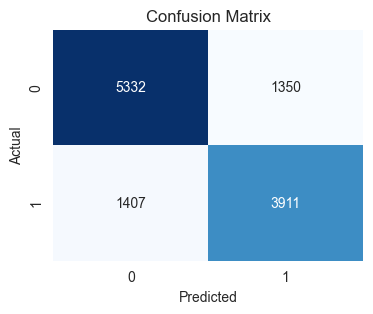

In [94]:
# Evaluate the model
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Neural Network

In [ ]:
df_train_ANN = df_new.copy()
X = df_train_ANN.drop('readmitted',axis=1)
y = df_train_ANN['readmitted']
X_train,X_test,y_train,y_test = train_test_split(X[new_features],y,test_size=0.3,random_state=101)

# scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Epoch 1/100
2227/2227 [==============================] - 18s 7ms/step - loss: 0.5330 - accuracy: 0.7530 - val_loss: 0.4728 - val_accuracy: 0.7930
Epoch 2/100
2227/2227 [==============================] - 17s 7ms/step - loss: 0.4929 - accuracy: 0.7864 - val_loss: 0.4641 - val_accuracy: 0.7945
Epoch 3/100
2227/2227 [==============================] - 17s 8ms/step - loss: 0.4847 - accuracy: 0.7896 - val_loss: 0.4599 - val_accuracy: 0.7966
Epoch 4/100
2227/2227 [==============================] - 16s 7ms/step - loss: 0.4803 - accuracy: 0.7908 - val_loss: 0.4545 - val_accuracy: 0.7972
Epoch 5/100
2227/2227 [==============================] - 17s 8ms/step - loss: 0.4770 - accuracy: 0.7917 - val_loss: 0.4578 - val_accuracy: 0.7946
Epoch 6/100
2227/2227 [==============================] - 17s 8ms/step - loss: 0.4762 - accuracy: 0.7929 - val_loss: 0.4557 - val_accuracy: 0.7974
Epoch 7/100
2227/2227 [==============================] - 17s 8ms/step - loss: 0.4741 - accuracy: 0.7933 - val_loss: 0.4584 -

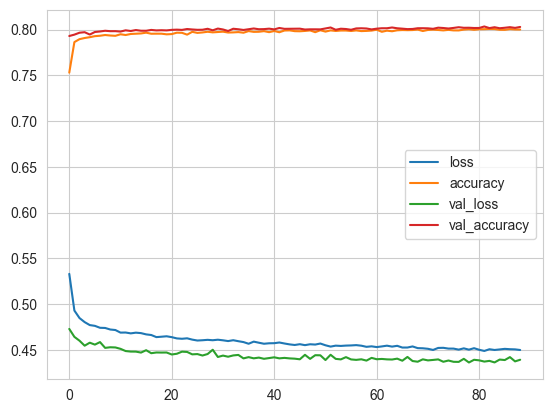

In [ ]:
# using ANN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,ActivityRegularization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1,l2


# create model
model = Sequential()
model.add(Dense(1286, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

#possible values for activation function

# compile model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# early stopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

# train model
model.fit(x=X_train_scaled,y=y_train.values,epochs=100,validation_data=(X_test_scaled,y_test.values),callbacks=[early_stop])

# evaluate model
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.show()


# Comparing to the previous version - without new feature (ENCOUNTER_NUM)
-------------------------------------------------------------------------------------------------------
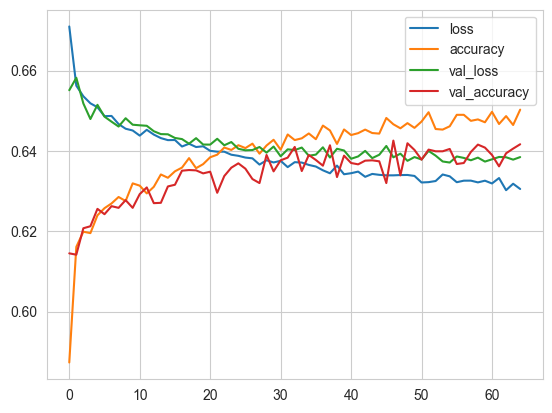
### This run has impressive improvement, the loss decrease to almost 0.63 and we got approximately 0.641 for val_acc and 0.65 for acc, The model is as followed:
#### create model
+ model = Sequential()
+ model.add(Dense(128, activation='relu'))
+ model.add(Dropout(0.5))
+ model.add(Dense(64,activation='relu'))
+ model.add(Dropout(0.5))
+ model.add(Dense(32,activation='relu'))
+ model.add(Dense(1,activation='sigmoid'))

#possible values for activation function

#### compile model
+ model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#### early stopping
+ early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

### Unlike knn, ANN need lots of data, so we used a whole dataset instead of just 40000-50000 rows
----------------------------------------------------------------------------------------------------------



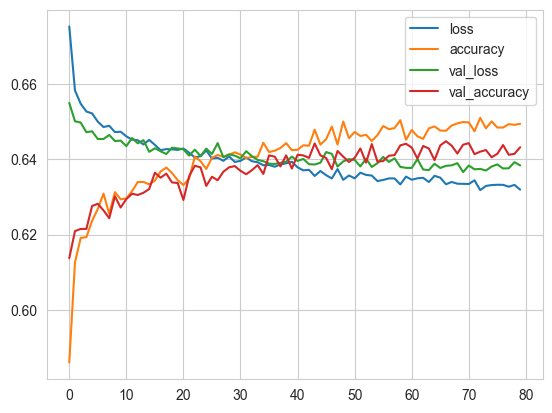
# Code for this version
#### create model
+ model = Sequential()
+ model.add(Dense(128, activation='relu'))
+ model.add(Dropout(0.5))
+ model.add(Dense(64,activation='tanh'))
+ model.add(Dropout(0.5))
+ model.add(Dense(32,activation='tanh'))
+ model.add(Dense(1,activation='sigmoid'))

#possible values for activation function

#### compile model
+ model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

#### early stopping
+ early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)
----------------------------------------------------------------------------------------------

# RNN

Epoch 1/100
2227/2227 [==============================] - 58s 24ms/step - loss: 0.6410 - accuracy: 0.6265 - val_loss: 0.5519 - val_accuracy: 0.7430
Epoch 2/100
2227/2227 [==============================] - 54s 24ms/step - loss: 0.5404 - accuracy: 0.7449 - val_loss: 0.5340 - val_accuracy: 0.7412
Epoch 3/100
2227/2227 [==============================] - 54s 24ms/step - loss: 0.5147 - accuracy: 0.7682 - val_loss: 0.4943 - val_accuracy: 0.7777
Epoch 4/100
2227/2227 [==============================] - 56s 25ms/step - loss: 0.5064 - accuracy: 0.7734 - val_loss: 0.4867 - val_accuracy: 0.7810
Epoch 5/100
2227/2227 [==============================] - 65s 29ms/step - loss: 0.4939 - accuracy: 0.7784 - val_loss: 0.4710 - val_accuracy: 0.7838
Epoch 6/100
2227/2227 [==============================] - 76s 34ms/step - loss: 0.4823 - accuracy: 0.7854 - val_loss: 0.4703 - val_accuracy: 0.7869
Epoch 7/100
2227/2227 [==============================] - 57s 25ms/step - loss: 0.4758 - accuracy: 0.7874 - val_loss: 0

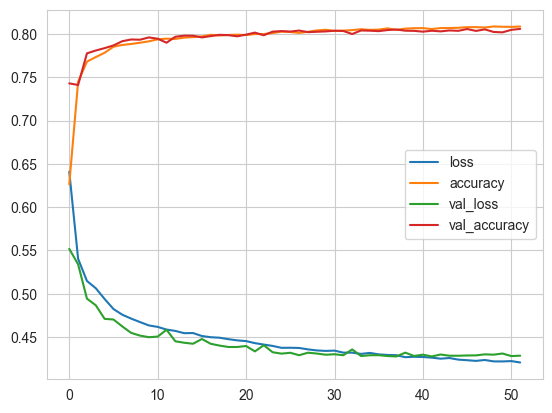

In [ ]:
# Using RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2

# data
df_train_rnn = df_new.copy()
X = df_train_rnn.drop('readmitted',axis=1)
y = df_train_rnn['readmitted']
X_train,X_test,y_train,y_test = train_test_split(X[new_features],y,test_size=0.3,random_state=101)

# scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# reshape the data
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# create model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train_scaled.shape[1], 1), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# train model
model.fit(x=X_train_scaled, y=y_train.values, epochs=100, validation_data=(X_test_scaled, y_test.values), callbacks=[early_stop])

# evaluate model
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.show()


# Gradient Boosting

[[7001 1121]
 [1720 5158]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      8122
           1       0.82      0.75      0.78      6878

    accuracy                           0.81     15000
   macro avg       0.81      0.81      0.81     15000
weighted avg       0.81      0.81      0.81     15000

0.8106


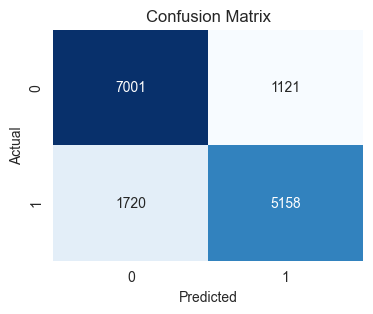

In [ ]:
# Using gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

# data
df_train_gb = df_new.copy().iloc[:50000,:]
X = df_train_gb.drop('readmitted',axis=1)
y = df_train_gb['readmitted']
X_train,X_test,y_train,y_test = train_test_split(X[new_features],y,test_size=0.3,random_state=101)

# scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train model

gb = GradientBoostingClassifier()
gb.fit(X_train_scaled,y_train)
y_pred = gb.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### ==> We see that KNN and Gradient Boosting are 2 models that are not very data craving, why? Because they are performing better when being trained with less data or the test size become larger.

# AdaBoost

[[13340  3224]
 [ 3998  9968]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79     16564
           1       0.76      0.71      0.73     13966

    accuracy                           0.76     30530
   macro avg       0.76      0.76      0.76     30530
weighted avg       0.76      0.76      0.76     30530

0.7634457910252211


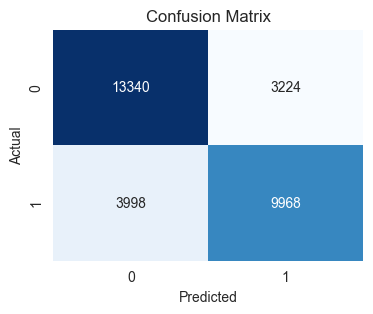

In [ ]:
# Using AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# data
df_train_ada = df_new.copy()
X = df_train_ada.drop('readmitted',axis=1)
y = df_train_ada['readmitted']
X_train,X_test,y_train,y_test = train_test_split(X[new_features],y,test_size=0.3,random_state=101)

# scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train model
ada = AdaBoostClassifier()
ada.fit(X_train_scaled,y_train)
y_pred = ada.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# XG Boost

[[14281  2283]
 [ 3638 10328]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83     16564
           1       0.82      0.74      0.78     13966

    accuracy                           0.81     30530
   macro avg       0.81      0.80      0.80     30530
weighted avg       0.81      0.81      0.80     30530

0.806059613494923


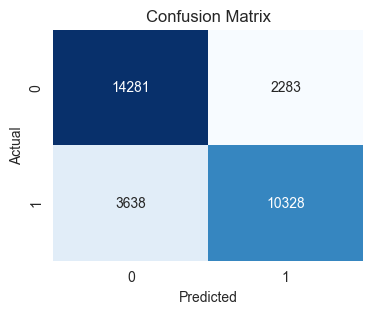

In [134]:
# Using XGBoost
from xgboost import XGBClassifier

# data
df_train_xgb = df_new.copy()
X = df_train_xgb.drop('readmitted',axis=1)
y = df_train_xgb['readmitted']
X_train,X_test,y_train,y_test = train_test_split(X[new_features],y,test_size=0.3,random_state=101)

# scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train model
xgb = XGBClassifier()
xgb.fit(X_train_scaled,y_train)
y_pred = xgb.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Decision Tree

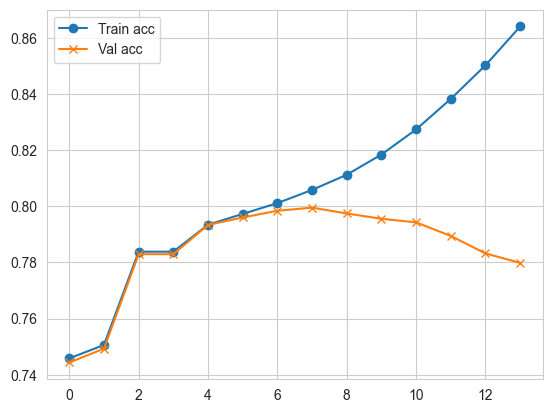

In [120]:
# data
df_train_dt = df_new.copy()
X = df_train_dt.drop('readmitted',axis=1)
y = df_train_dt['readmitted']
X_train,X_test,y_train,y_test = train_test_split(X[new_features],y,test_size=0.3,random_state=101)

# scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Finding best max_depth for Decision Tree
from sklearn.tree import DecisionTreeClassifier
train_acc = []
val_acc = []
for i in range(1, 15):
    model = DecisionTreeClassifier(max_depth=i, random_state=42)
    model.fit(X_train_scaled, y_train)
    
    train_acc.append(model.score(X_train_scaled, y_train))
    val_acc.append(model.score(X_test_scaled, y_test))

plt.plot(train_acc, '-o', label = 'Train acc')
plt.plot(val_acc, '-x', label = 'Val acc')
plt.legend()
plt.show()

In [122]:
max_depth = val_acc.index(max(val_acc)) + 1
max_depth

8

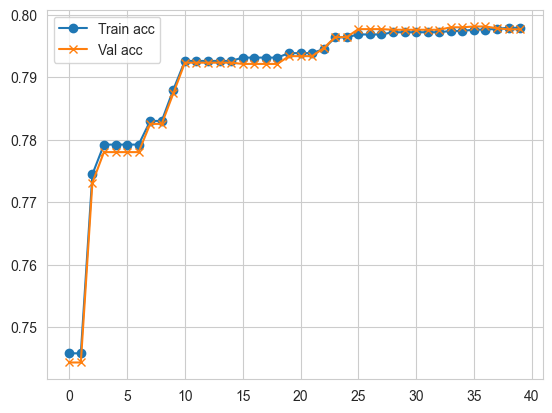

In [131]:
# data
df_train_dt = df_new.copy()
X = df_train_dt.drop('readmitted',axis=1)
y = df_train_dt['readmitted']
X_train,X_test,y_train,y_test = train_test_split(X[new_features],y,test_size=0.3,random_state=101)

# scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Finding best max_leaf_nodes for Decision Tree 
train_acc = []
val_acc = []
for i in range(2, 42):
    model = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=i, random_state=42)
    model.fit(X_train_scaled, y_train)
    
    train_acc.append(model.score(X_train_scaled, y_train))
    val_acc.append(model.score(X_test_scaled, y_test))


plt.plot(train_acc, '-o', label = 'Train acc')
plt.plot(val_acc, '-x', label = 'Val acc')
plt.legend()
plt.show()

In [132]:
max_leaf = val_acc.index(max(val_acc)) + 2
max_leaf

37

# Desicion Tree

[[14749  1815]
 [ 4348  9618]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83     16564
           1       0.84      0.69      0.76     13966

    accuracy                           0.80     30530
   macro avg       0.81      0.79      0.79     30530
weighted avg       0.80      0.80      0.80     30530

0.7981329839502129


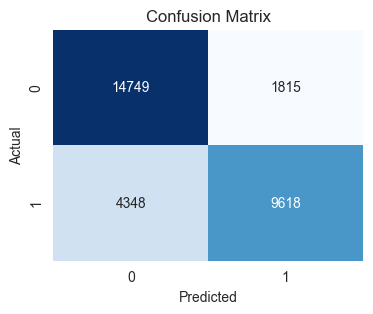

In [133]:
# Decision tree with no hyperparameter tuning
from sklearn.metrics import accuracy_score, \
                            precision_score, \
                            recall_score, \
                            f1_score
dct = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=37, random_state=42)
dct.fit(X_train_scaled, y_train)

y_pred = dct.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Random Forest

[[14137  2427]
 [ 3643 10323]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82     16564
           1       0.81      0.74      0.77     13966

    accuracy                           0.80     30530
   macro avg       0.80      0.80      0.80     30530
weighted avg       0.80      0.80      0.80     30530

0.8011791680314445


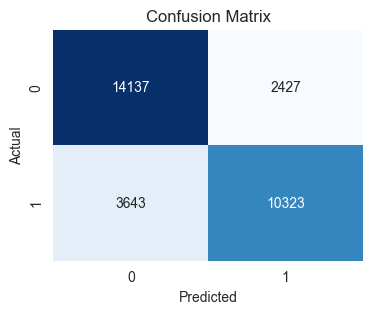

In [115]:
from sklearn.ensemble import RandomForestClassifier
# data
df_train_rb = df_new.copy()
X = df_train_rb.drop('readmitted',axis=1)
y = df_train_rb['readmitted']
X_train,X_test,y_train,y_test = train_test_split(X[new_features],y,test_size=0.3,random_state=101)

# scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Using random forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled,y_train)
y_pred = rf.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Naive Bayes

[[6557 1565]
 [2150 4728]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78      8122
           1       0.75      0.69      0.72      6878

    accuracy                           0.75     15000
   macro avg       0.75      0.75      0.75     15000
weighted avg       0.75      0.75      0.75     15000

0.7523333333333333


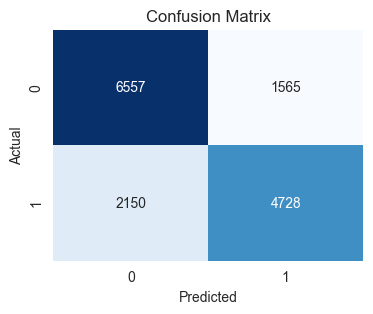

In [112]:
from sklearn.naive_bayes import BernoulliNB

# data
df_train_nb = df_new.copy().iloc[:50000, :]
X = df_train_nb.drop('readmitted',axis=1)
y = df_train_nb['readmitted']
X_train,X_test,y_train,y_test = train_test_split(X[new_features],y,test_size=0.3,random_state=101)

# scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Model
nb = BernoulliNB()
nb.fit(X_train_scaled, y_train)

y_pred = nb.predict(X_test_scaled)
# Evaluate the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression

[[6748 1374]
 [2581 4297]]
              precision    recall  f1-score   support

           0       0.72      0.83      0.77      8122
           1       0.76      0.62      0.68      6878

    accuracy                           0.74     15000
   macro avg       0.74      0.73      0.73     15000
weighted avg       0.74      0.74      0.73     15000

0.7363333333333333


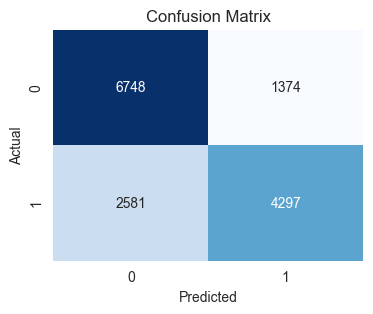

In [ ]:
# Using Logistic Regression
from sklearn.linear_model import LogisticRegression

# data
df_train_lr = df_new.copy().iloc[:50000,:]
X = df_train_lr.drop('readmitted',axis=1)
y = df_train_lr['readmitted']
X_train,X_test,y_train,y_test = train_test_split(X[new_features],y,test_size=0.3,random_state=101)

# scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train model
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)
y_pred = lr.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Support Vector Machine

[[7303  819]
 [2174 4704]]
              precision    recall  f1-score   support

           0       0.77      0.90      0.83      8122
           1       0.85      0.68      0.76      6878

    accuracy                           0.80     15000
   macro avg       0.81      0.79      0.79     15000
weighted avg       0.81      0.80      0.80     15000

0.8004666666666667


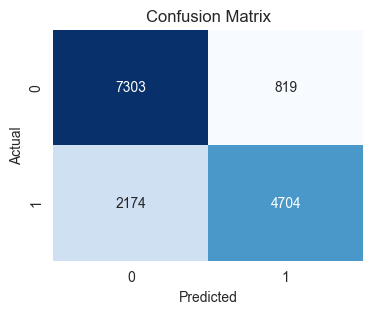

In [ ]:
# Using SVM
from sklearn.svm import SVC

# data
df_train_svm = df_new.copy().iloc[:50000,:]
X = df_train_svm.drop('readmitted',axis=1)
y = df_train_svm['readmitted']
X_train,X_test,y_train,y_test = train_test_split(X[new_features],y,test_size=0.3,random_state=101)

# scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train model
svm = SVC(kernel='rbf')
svm.fit(X_train_scaled,y_train)
y_pred = svm.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

